In [1]:
import MPI_collective
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, execute, transpile, Aer, assemble

import numpy as np
from convert import *
aer_sim = Aer.get_backend('aer_simulator')
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import testCases
import math

from qiskit.tools.monitor import job_monitor
import qiskit
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService

 # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
IBMProvider.save_account(token = "1beb2d81aa66655b9a108593ef47e2bc8bf948f6ada7bd2eefbdbcb76d962931d41dc9bf52e7b65483b917b6da8f86f65cd212fe5f1ff5c633a1e8aeeab11e5e", overwrite=True) 
# Note: This can be any hub/group/project that has access to the required device and the Qiskit runtime.
hub = "ibm-q"
group = "open"
project = "main"
backend_name = "ibmq_manila"
hgp = f"{hub}/{group}/{project}"
# Get our backend
provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)
print(f"Using backend {backend.name}")
service = QiskitRuntimeService()



Using backend ibmq_manila


In [2]:
# build distributed circuit with N nodes and returns circuit with list of quantum registers
def buildQMPI(N):
    circ = QuantumCircuit() 
    qrs = [] 
    for i in range(N):
        qr = QuantumRegister(1, name = 'q'+str(i))
        circ.add_register(qr)
        qrs.append(qr)
    cr = ClassicalRegister(N,name = 'cr')
    circ.add_register(cr)
    return circ, qrs

In [3]:
qasm3_backends = set(
    backend.name for backend in provider.backends(dynamic_circuits=True)
)
# ionq, quantinuum, rigetti dont
print(f"The following backends support dynamic circuits: {qasm3_backends}")

The following backends support dynamic circuits: {'ibmq_manila', 'ibm_nairobi', 'ibm_perth', 'ibm_lagos', 'ibmq_jakarta'}


In [35]:
import qiskit.tools.jupyter

%qiskit_version_table

In [36]:
# Running checks for the correct dependencies
import qiskit
from packaging import version

if not (
    version.parse(qiskit.__qiskit_version__["qiskit-terra"]) >= version.parse("0.22")
):
    print(
        "Incorrect dependencies. Found qiskit-terra: "
        + qiskit.__qiskit_version__["qiskit-terra"]
        + "\nNeed qiskit-terra >= 0.22"
    )

try:
    import qiskit_ibm_provider
except ModuleNotFoundError:
    print(
        "You must install the qiskit_ibm_provider with 'pip install qiskit_ibm_provider'"
    )
    raise
# Ignoring warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [37]:
run testCases.py

/Users/tommtommbom/.pyenv/versions/3.10.7/lib/python3.10/site-packages/qiskit_aer/backends/aerbackend.py:463: DeprecationWarning: Setting metadata to None was deprecated in Terra 0.24.0 and this ability will be removed in a future release. Instead, set metadata to an empty dictionary.
  circ.metadata = metadata


Hellinger fidelity:1.0
Hellinger fidelity:1.0
Hellinger fidelity:0.9996389967497974
Hellinger fidelity:0.9945254304332496


.

Hellinger fidelity:1.0
Hellinger fidelity:0.9974492565636485


...
----------------------------------------------------------------------
Ran 4 tests in 4.738s

OK


Hellinger fidelity:1.0
Hellinger fidelity:1.0
Hellinger fidelity:1.0


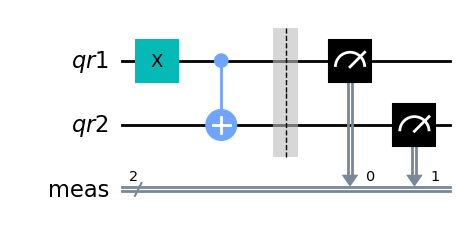

In [13]:
qc = testCases.single()
#qc,_ = convertQC(qc)
qc.draw('mpl')

In [14]:
mapped_circuit4 = transpile(qc, backend=backend)

In [64]:
# prepare the circuit for the backend
mapped_circuit4 = transpile(qc, backend=backend)
#mapped_circuit3.draw(idle_wires=False, output="mpl")

# execute the circuit
job4 = backend.run(mapped_circuit4, shots=1000, dynamic=True)
print(job4.status())
print(job4.job_id())

JobStatus.QUEUED
chqq42c2b9sdqn3q24l0


In [15]:
job4 = service.job('chqq42c2b9sdqn3q24l0')
print(job4.status())

JobStatus.DONE


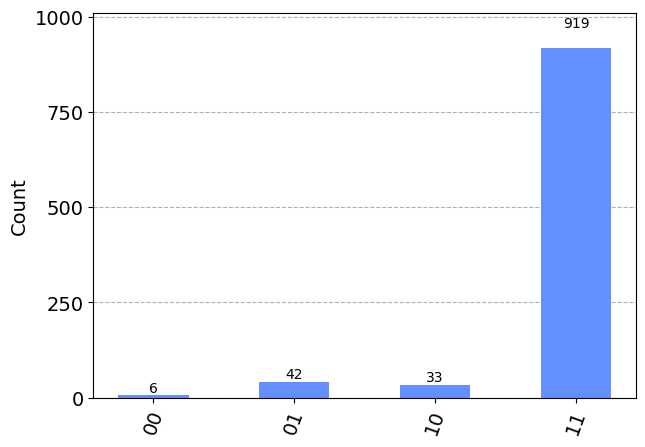

In [16]:
result4 = job4.result()
counts4 = result4.get_counts()
plot_histogram(counts4)


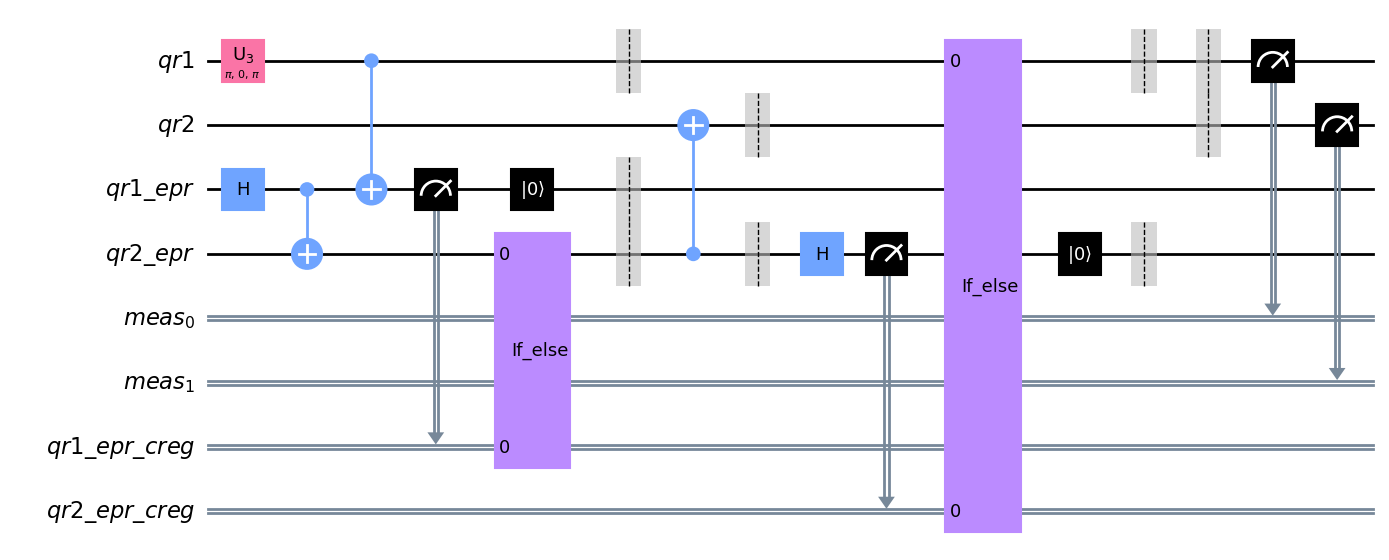

In [17]:
qc,_ = convertQC(qc)
mapped_circuit5 = transpile(qc, backend=backend)
qc.draw('mpl')

In [67]:
# prepare the circuit for the backend
mapped_circuit5 = transpile(qc, backend=backend)
#mapped_circuit3.draw(idle_wires=False, output="mpl")

# execute the circuit
job5 = backend.run(mapped_circuit5, shots=1000, dynamic=True)
print(job5.status())
print(job5.job_id())

JobStatus.QUEUED
chqq46daqbbvbu0v9nug


In [18]:
job5 = service.job('chqq46daqbbvbu0v9nug')
print(job5.status())

JobStatus.DONE


{'00': 48, '01': 191, '10': 103, '11': 658}


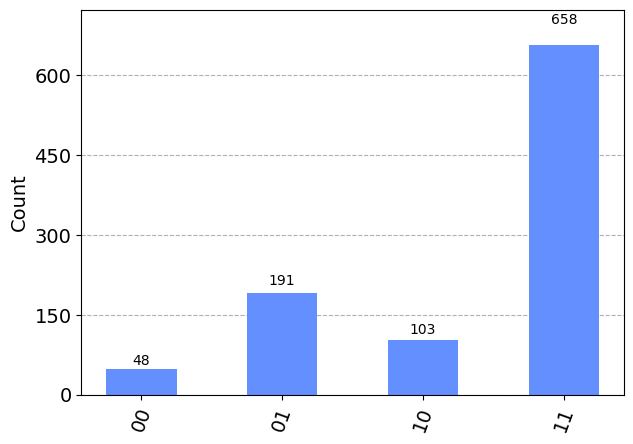

In [19]:
result5 = job5.result()
counts5 = result5.get_counts()
gok5 = getActualCounts(mapped_circuit5, counts5)
print(gok5)
plot_histogram(gok5)



In [22]:
qiskit.quantum_info.hellinger_fidelity(gok, gok5)

0.6580000000000001

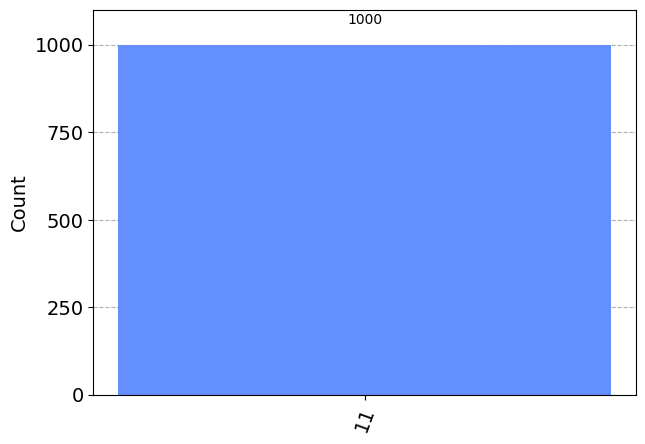

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe3 = transpile(qc, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
gok = getActualCounts(t_qpe3, answer)
plot_histogram(gok)
#qiskit.quantum_info.hellinger_fidelity(gok5, gok)

In [91]:
qc = testCases.single()
aer_sim = Aer.get_backend('aer_simulator')
shots = 100
t_qpe3 = transpile(qc, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)
qiskit.quantum_info.hellinger_fidelity(answer, gok)

0.0

Text(0, 0.5, '$<\\sigma_z>$')

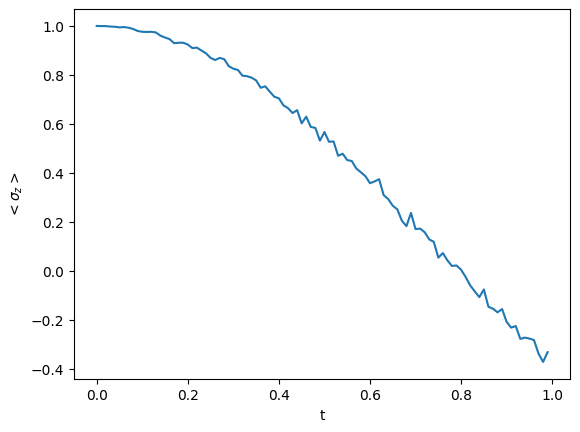

In [47]:
##### Single step of Trotter propagation in transverse-field Ising model #####

# get counts for a single qubit and compute magnetization from counts dict
def magnetization(counts, shots, N):
    n = np.zeros(N)
    for key, val in counts.items():
        for i in range(len(key)):
            if int(key[i]) == 0:
                n[i] += val
                #print(n)
    n = [1*x/shots-1*(shots-x)/shots for x in n]
    return sum(n)/len(n)

### Physical parameters (atomic units) ###
J = 0.25 # Exchange coupling
B = 1 # Transverse magnetic field
dt = 0.01 # Time-discretization unit
T = 100
shots = 1000
N = 3 # num qubits
aer_sim = Aer.get_backend('aer_simulator')
### Build a circuit ###
times = np.arange(0,dt*T, dt)
ms = np.zeros(len(times))
for i in range(T):
    circ = QuantumCircuit(N, N) 
    for j in range(i):
        for k in range(N):
            circ.rx(-2*dt*B, k) # Transverse-field propagation of spin k
        circ.barrier()
        for l in range(N-1):
            circ.cx(l, l+1) # Exchange-coupling time propagation 
            circ.rz(-2*dt*J, l+1) 
            circ.cx(l, l+1) 
        circ.barrier()
        
        
    #circ.h(range(N)) # measure in x basis 
    circ.measure(range(N), range(N)) # Measure both spins
    result = aer_sim.run(circ, shots = shots).result()
    counts = result.get_counts(circ)
    ms[i] = magnetization(counts, shots, N)
#print(ms)
plt.plot(times, ms)
plt.xlabel("t")
plt.ylabel('$<\sigma_z>$')


Text(0, 0.5, '$<\\sigma_z>$')

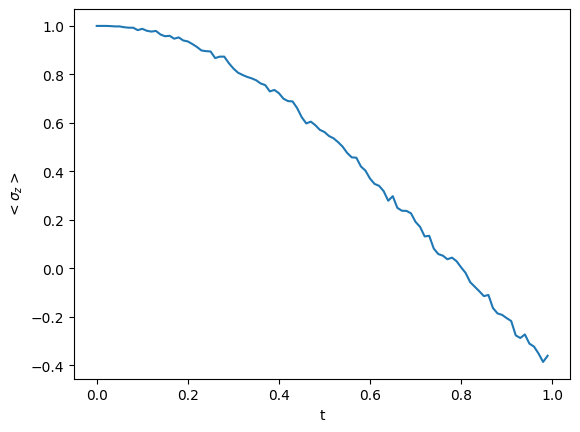

In [48]:
##### Single step of Trotter propagation in transverse-field Ising model with QMPI #####

# get counts for a single qubit and compute magnetization from counts dict
def magnetization(counts, shots, N):
    n = np.zeros(N)
    for key, val in counts.items():
        for i in range(len(key)):
            if int(key[i]) == 0:
                n[i] += val
                #print(n)
    n = [1*x/shots-1*(shots-x)/shots for x in n]
    return sum(n)/len(n)

### Physical parameters (atomic units) ###
J = 0.25 # Exchange coupling
B = 1 # Transverse magnetic field
dt = 0.01 # Time-discretization unit
T = 100
shots = 1000
N = 3 # num qubits
aer_sim = Aer.get_backend('aer_simulator')
### Build a circuit ###
times = np.arange(0,dt*T, dt)
ms = np.zeros(len(times))
for i in range(T):
    # build dist circuit
    circ, qrs = buildQMPI(N)
    qrlast = QuantumRegister(N, name = 'qlast')
    circ.add_register(qrlast) 

    # make epr pairs
    m = MPI_collective.CollectiveMPI(circ,n=1)
    arr = [x[0] for x in qrs]

    cq = QuantumCircuit(2)
    cq.cx(0, 1) # Exchange-coupling time propagation 
    cq.rz(-2*dt*J, 1) 
    cq.cx(0, 1) 

    for j in range(i):
        for k in range(N):
            circ.rx(-2*dt*B*j, k+N) # Transverse-field propagation of spin k
        m.scatter(qrlast, arr)
        m.sequentialReduce(arr,cq)       
    #circ.h(range(N)) # measure in x basis 
    circ.measure(range(N), range(N)) # Measure both spins
    result = aer_sim.run(circ, shots = shots).result()
    counts = result.get_counts(circ)
    actCounts = getActualCounts(circ, counts)
    ms[i] = magnetization(actCounts, shots, N)
#print(ms)
plt.plot(times, ms)
plt.xlabel("t")
plt.ylabel('$<\sigma_z>$')

In [6]:
# trotterization circuit for visualization 
N = 3 # number of qubits
T = 3 # trotter factor, going to choose a deltaT of 1
J = [1, 1, 1]
h = [0.5, 0.25, 1]
qc = QuantumCircuit(N)
for i in range(T):
    for j in range(N-1):
        qc.cx(j,j+1)
        qc.rx(2*J[0],j+1)
        qc.ry(2*J[1],j+1)
        qc.rz(2*J[2],j+1)
        qc.cx(j,j+1)
    qc.barrier()
    for k in range(N):
        qc.rx(2*h[0],k)
        qc.ry(2*h[1],k)
        qc.rz(2*h[2],k)
    qc.barrier()
qc.draw()

»
q_0: ──■───────────────────────────────■───────────────────────────────────────»
     ┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐                                     »
q_1: ┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├┤ X ├──■───────────────────────────────■──»
     └───┘└───────┘└───────┘└───────┘└───┘┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐»
q_2: ─────────────────────────────────────┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├┤ X ├»
                                          └───┘└───────┘└───────┘└───────┘└───┘»
«      ░ ┌───────┐┌─────────┐┌───────┐ ░                                      »
«q_0: ─░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░───■───────────────────────────────■──»
«      ░ ├───────┤├─────────┤├───────┤ ░ ┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐»
«q_1: ─░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├┤ X ├»
«      ░ ├───────┤├─────────┤├───────┤ ░ └───┘└───────┘└───────┘└───────┘└───┘»
«q_2: ─░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░──────────────────────────────────────»
«      ░ └───────┘└─────────┘└───────┘ ░                                      »
«                                           ░ ┌───────┐┌─────────┐┌───────┐ ░ »
«q_0: ──────────────────────────────────────░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─»
«                                           ░ ├───────┤├─────────┤├───────┤ ░ »
«q_1: ──■───────────────────────────────■───░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─»
«     ┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐ ░ ├───────┤├─────────┤├───────┤ ░ »
«q_2: ┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├┤ X ├─░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─»
«     └───┘└───────┘└───────┘└───────┘└───┘ ░ └───────┘└─────────┘└───────┘ ░ »
«                                                                          »
«q_0: ──■───────────────────────────────■──────────────────────────────────»
«     ┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐                                »
«q_1: ┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├┤ X ├──■─────────────────────────────»
«     └───┘└───────┘└───────┘└───────┘└───┘┌─┴─┐┌───────┐┌───────┐┌───────┐»
«q_2: ─────────────────────────────────────┤ X ├┤ Rx(2) ├┤ Ry(2) ├┤ Rz(2) ├»
«                                          └───┘└───────┘└───────┘└───────┘»
«           ░ ┌───────┐┌─────────┐┌───────┐ ░ 
«q_0: ──────░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─
«           ░ ├───────┤├─────────┤├───────┤ ░ 
«q_1: ──■───░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─
«     ┌─┴─┐ ░ ├───────┤├─────────┤├───────┤ ░ 
«q_2: ┤ X ├─░─┤ Rx(1) ├┤ Ry(0.5) ├┤ Rz(2) ├─░─
«     └───┘ ░ └───────┘└─────────┘└───────┘ ░

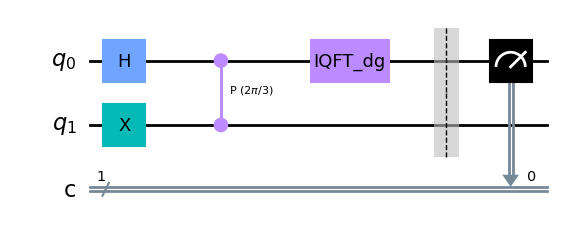

In [39]:
# quantum phase estimation
# Create and set up circuit
n = 1
qpe3 = QuantumCircuit(n+1, n)

# Apply H-Gates to counting qubits:
for qubit in range(n):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(n)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(n):
    holder = angle
    for i in range(repetitions-1):
        holder = angle+holder
    qpe3.cp(holder, counting_qubit, n);
    repetitions *= 2

# Do the inverse QFT:
qpe3 = qpe3.compose(QFT(n, inverse=True), range(n))

# Measure of course!
qpe3.barrier()
for nn in range(n):
    qpe3.measure(nn,nn)
#qpe3 = qpe3.decompose()
qpe3.draw('mpl')
#qpe3.qasm(filename = 'QPE_woqmpi.qasm')

{'10100011': 1, '11101000': 1, '01000110': 1, '00011101': 1, '10110110': 1, '01011101': 2, '01011111': 2, '01100001': 1, '10110100': 1, '01010001': 6, '01000111': 1, '10010100': 1, '01010110': 158, '01010011': 16, '01001110': 1, '00101111': 1, '01011011': 2, '01010010': 9, '01100100': 2, '11100011': 1, '01011100': 3, '01100011': 1, '01010100': 47, '11000011': 1, '01011010': 3, '01010101': 680, '01010111': 27, '01011001': 8, '01001111': 2, '01011000': 11, '01010000': 5, '01110001': 1, '01100110': 2}


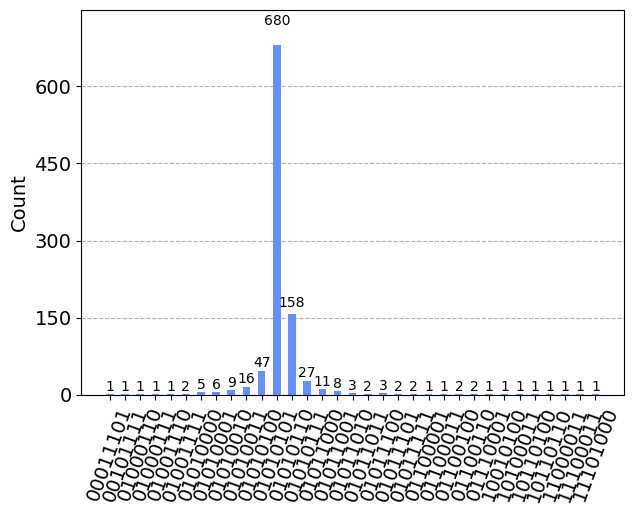

In [35]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe3 = transpile(qpe3, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
print(answer)
plot_histogram(answer)

In [72]:
# prepare the circuit for the backend
mapped_circuit2 = transpile(qpe3, backend=backend)
#mapped_circuit3.draw(idle_wires=False, output="mpl")

# execute the circuit
job2 = backend.run(mapped_circuit2, shots=1000)
print(job2.status())
print(job2.job_id())

JobStatus.QUEUED
chqq4kk2b9sdqn3q2iig


In [95]:
job2 = service.job('chqq4kk2b9sdqn3q2iig')
print(job2.status())

JobStatus.DONE


0.9998466970234563


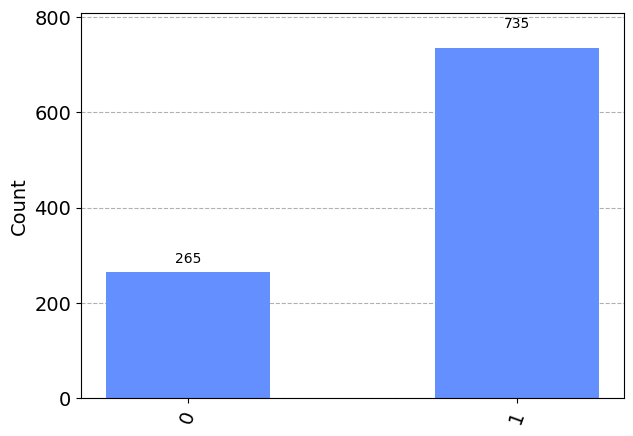

In [101]:
result = job2.result()
counts = result.get_counts()

#gok = getActualCounts(mapped_circuit, counts)
#print(gok)
#plot_histogram(gok)
print(qiskit.quantum_info.hellinger_fidelity(counts, answer))
plot_histogram(counts)

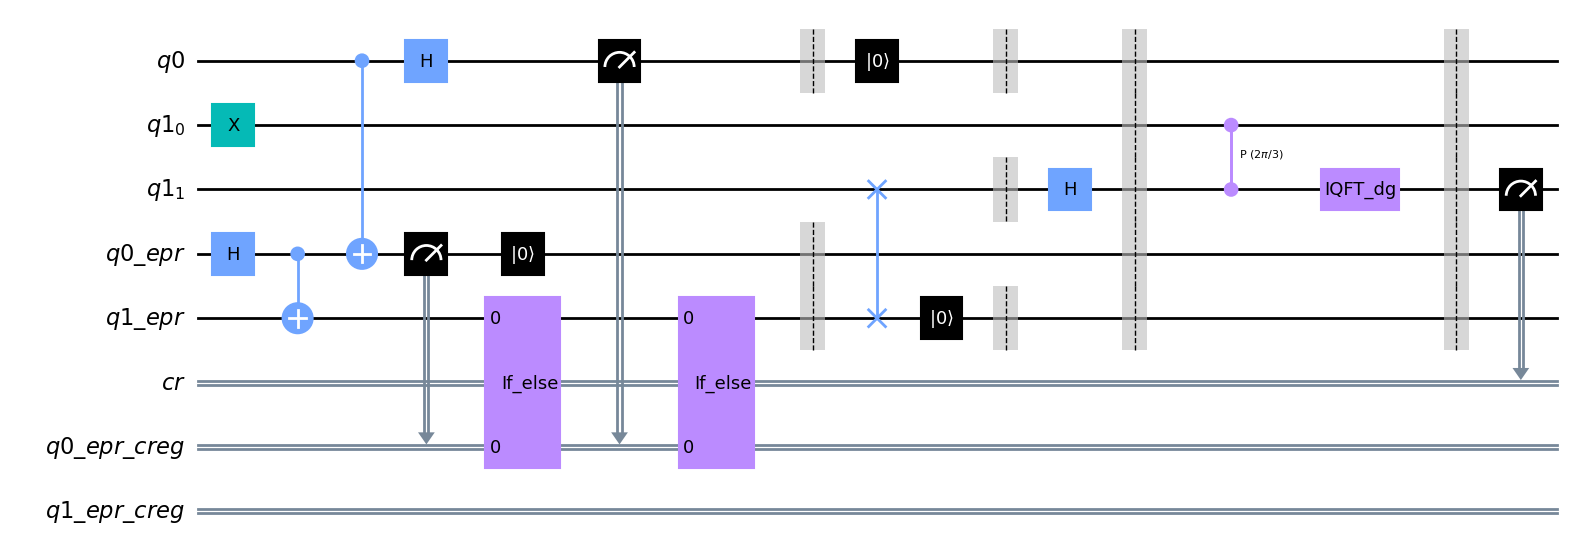

In [38]:
# preparing circuit
q = QuantumCircuit()
kk = 1
nn = [] 
for k in range(kk):
    qr = QuantumRegister(1, name = 'q'+str(k))
    nn.append(qr)
    q.add_register(qr)
qrlast = QuantumRegister(kk+1, name = 'q'+str(k+1))
cr = ClassicalRegister(kk,name = 'cr')
q.add_register(qrlast,cr)

# Prepare our eigenstate |psi>:
q.x(kk)
m = MPI_collective.CollectiveMPI(q,n=1)
arr = [x[0] for x in nn]
m.gather(arr, qrlast[1:])
# initialization of circuit
# Apply H-Gates to counting qubits:
for qubit in range(kk):
    q.h(kk+1+qubit)
    
q.barrier()

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(kk):
    holder = angle
    for i in range(repetitions-1):
        holder = angle+holder
    q.cp(holder, counting_qubit+kk+1, kk);
    repetitions *= 2

# Do the inverse QFT:
q = q.compose(QFT(kk, inverse=True), list(range(kk+1,kk+kk+1)))

# Measure of course!
q.barrier()
for n in range(kk):
    q.measure(n+kk+1,cr[n])

q.draw('mpl')

{'01010011': 11, '01010111': 30, '01010110': 145, '01010101': 731, '01011100': 1, '01010100': 30, '10000000': 1, '01011001': 9, '01011010': 4, '01010001': 2, '01001011': 2, '01011000': 9, '01001101': 1, '01001111': 1, '01001001': 2, '01110101': 1, '00110110': 1, '11100010': 1, '01010010': 5, '01000100': 1, '01011110': 1, '01100000': 1, '01000101': 1, '01001010': 2, '01000110': 1, '00110011': 1, '01000111': 2, '01011011': 1, '01001110': 1, '01100111': 1}


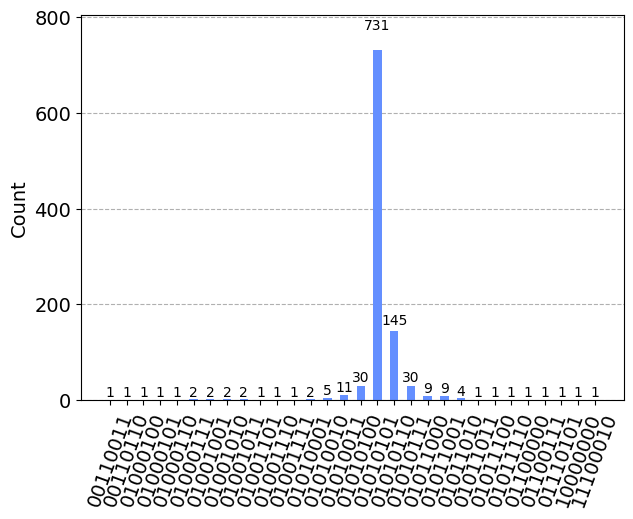

In [29]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator_matrix_product_state')
shots = 1000
t_qpe3 = transpile(q, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
gok = getActualCounts(t_qpe3, answer)
print(gok)
plot_histogram(gok)
# qasm - 2m20.6s
# aer_simulator 2m 19.4s 
# aer_simulator_statevector 2m33.8s
# aer_simulator_density_matrix - not enough memory
# aer_simulator_stabilizer - wrong gates 
# aer_simulator_extended_stabilizer > 10min
# aer_simulator_unitary - can't do reset and measure
# aer_simulator_superop - not enough memory
# aer_simulator_matrix_product_state 0.3s # good if don't need statemvector and just measure at the end
# statevector_simulator 3m 6.4s

In [61]:
# prepare the circuit for the backend
mapped_circuit3 = transpile(q, backend=backend)
#mapped_circuit3.draw(idle_wires=False, output="mpl")

# execute the circuit
job3 = backend.run(mapped_circuit3, shots=1000, dynamic=True)
print(job3.status())
print(job3.job_id())

JobStatus.QUEUED
chqq1o42b9sdqn3q0c6g


In [103]:
job3 = service.job('chqq1o42b9sdqn3q0c6g')
print(job3.status())

JobStatus.DONE


0.9874838200712708


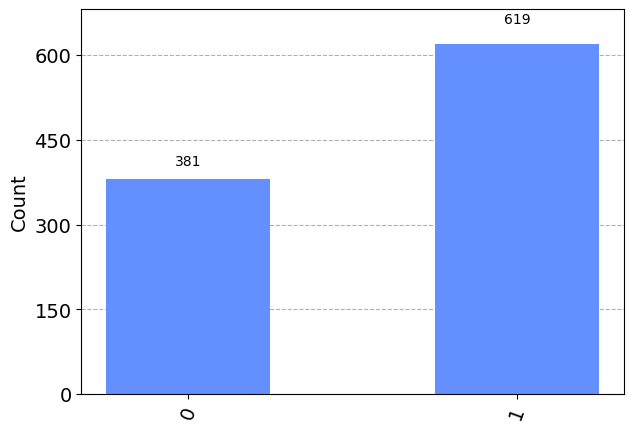

In [106]:
result3 = job3.result()
counts3 = result3.get_counts()
plot_histogram(counts3)
gok3 = getActualCounts(mapped_circuit3, counts3)
print(qiskit.quantum_info.hellinger_fidelity(gok3, answer))
plot_histogram(gok3)



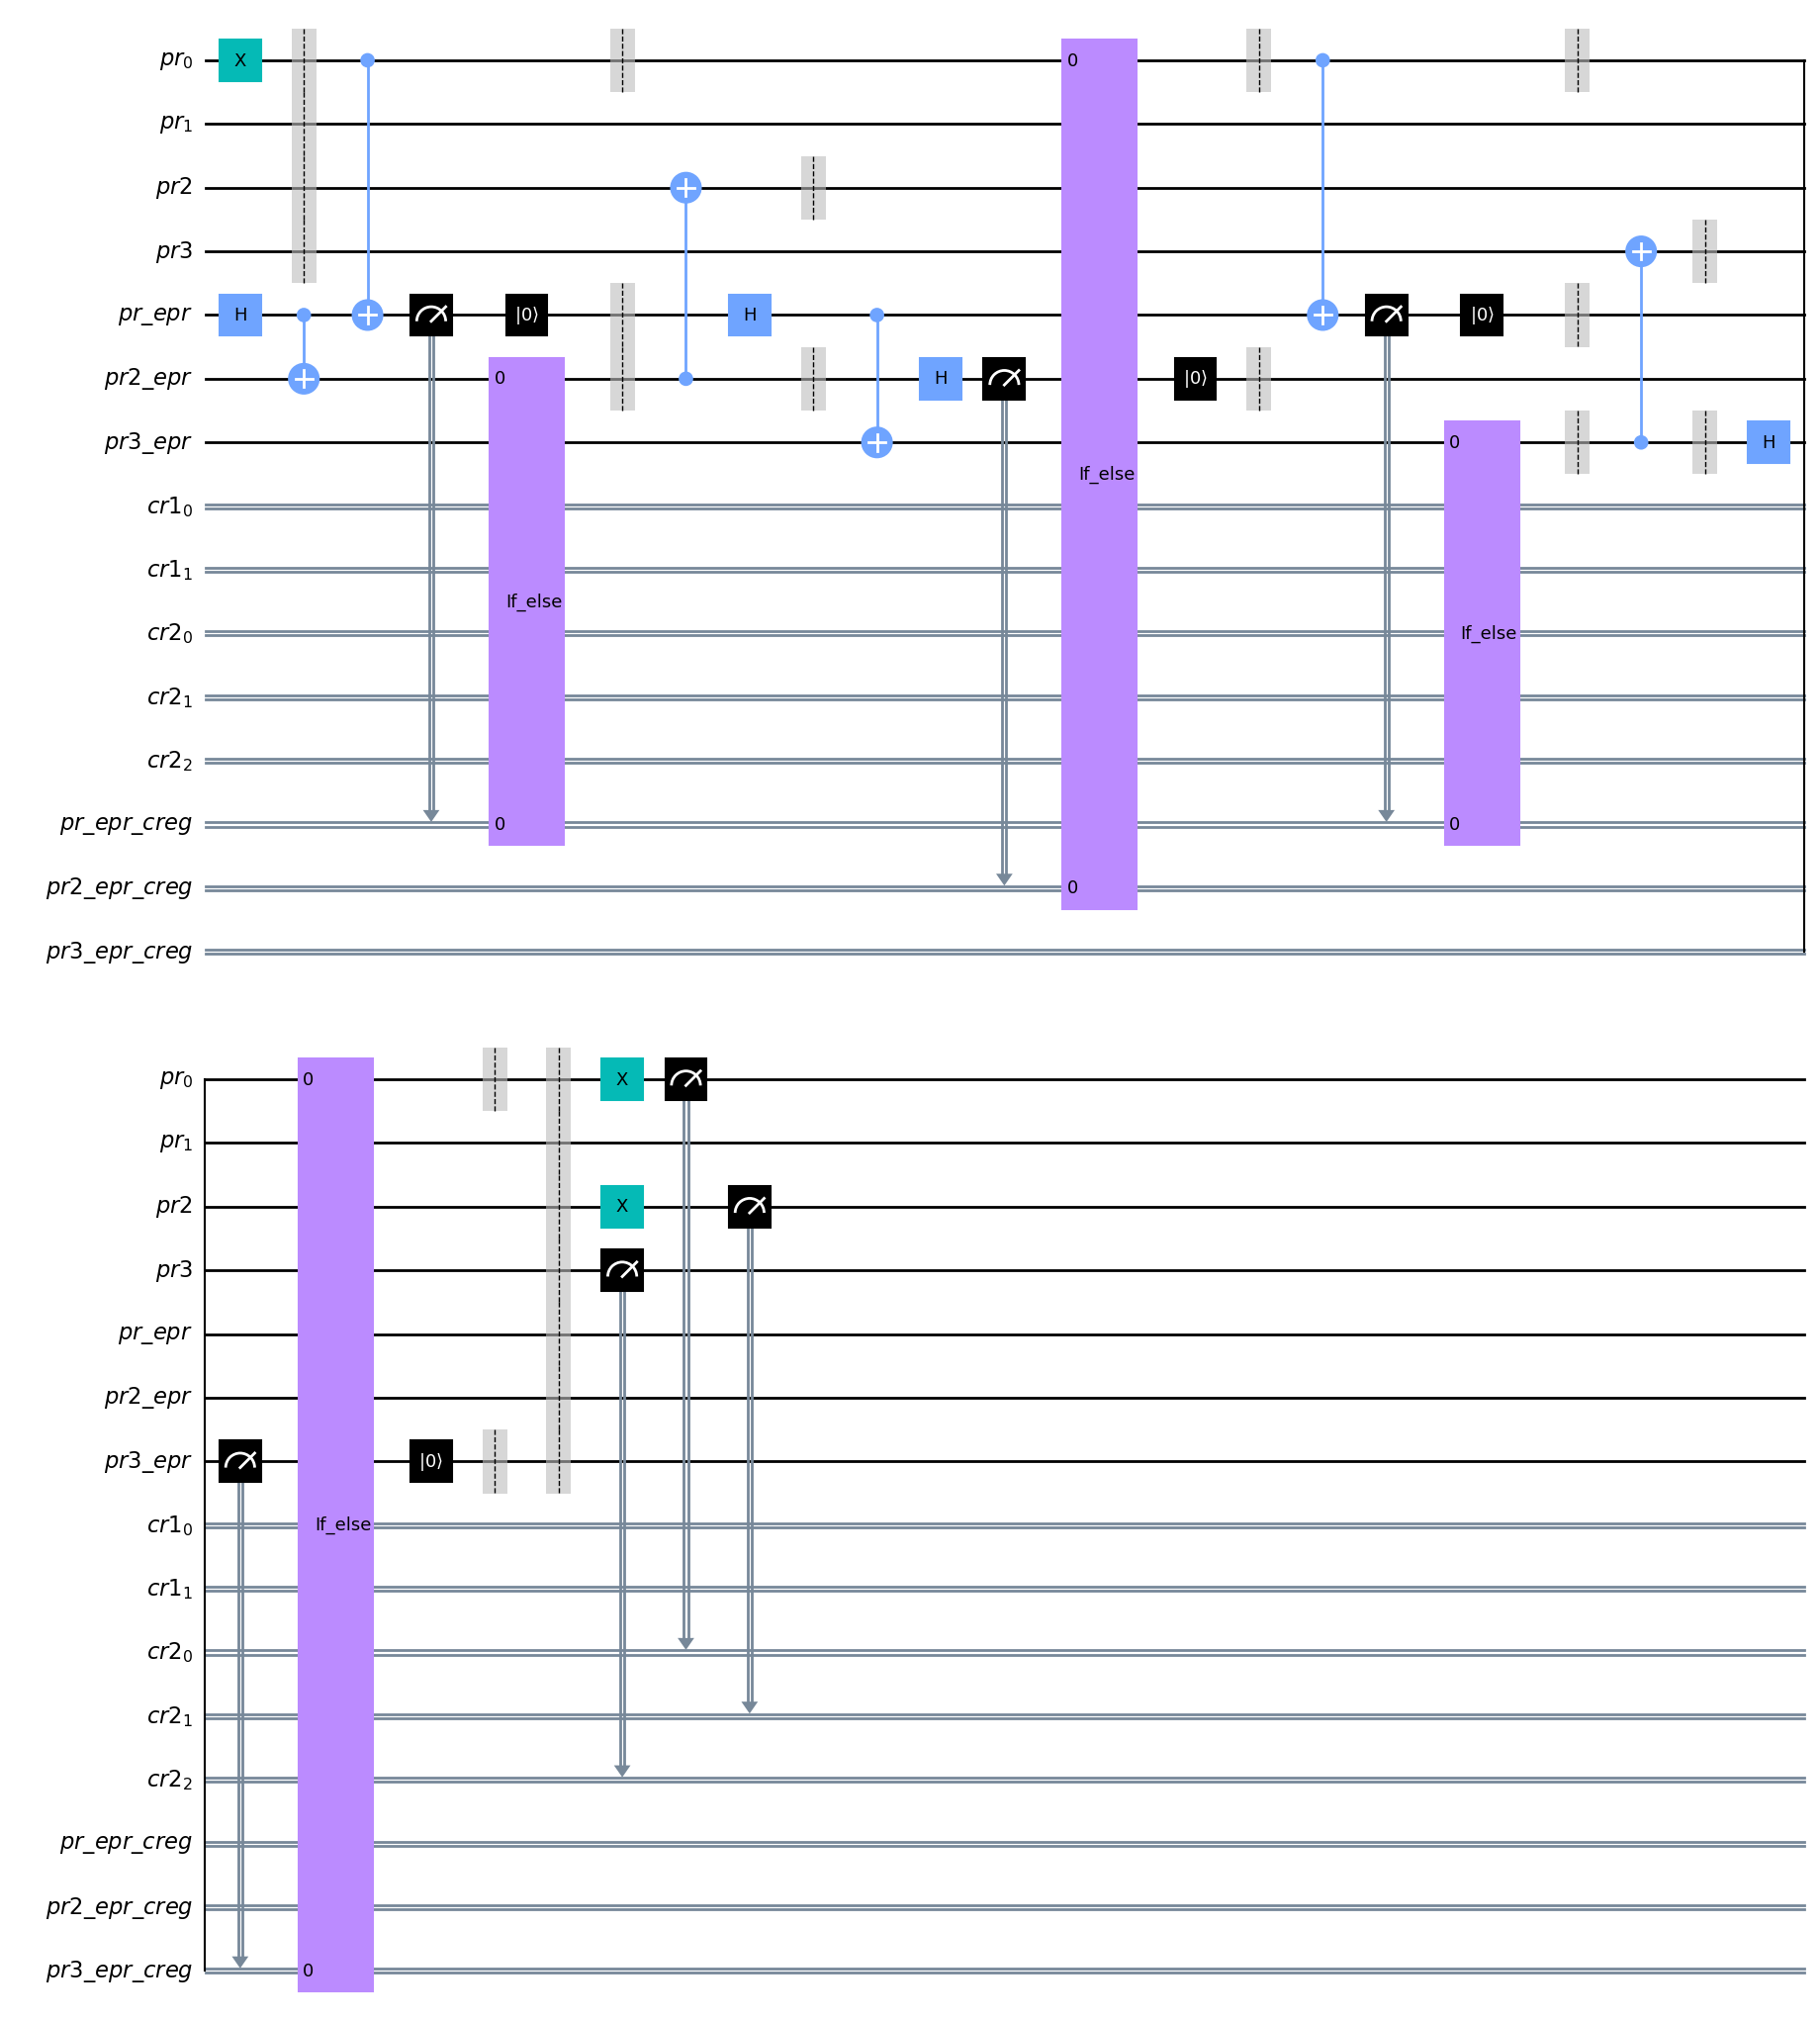

In [3]:
# check out brodcast
pp = QuantumCircuit()
pr = QuantumRegister(2, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(2, 'cr1')
cr2 = ClassicalRegister(3, 'cr2')
pp.add_register(pr,pr2,cr1,cr2, pr3)
pp.x(pr[0])
pp.barrier()
m = MPI_collective.CollectiveMPI(pp, pr, n=1)
m.brodcast([pr[0],pr2[0], pr3[0]])
#pp.barrier()
#pp.measure([pr[0], pr2[0]], [cr1[0], cr1[1]])
pp.barrier()
pp.x([pr[0],pr2[0]])
pp.measure([pr[0], pr2[0], pr3[0]], [cr2[0], cr2[1], cr2[2]])
pp.draw('mpl')

{'100 00': 1000}


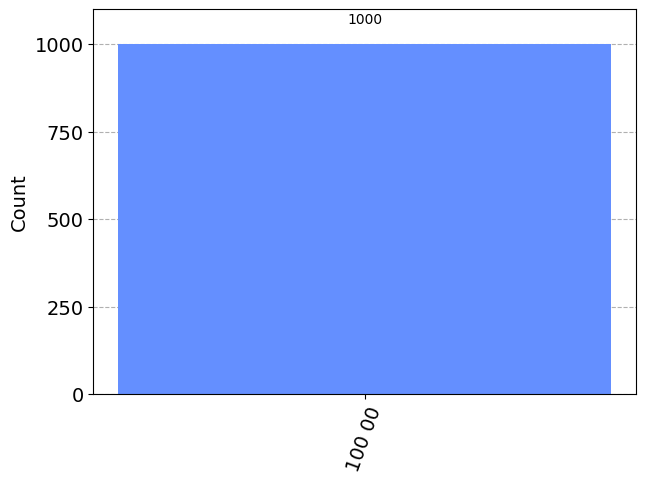

In [4]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_qpe3 = transpile(pp, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
gok = getActualCounts(t_qpe3, answer)
print(gok)
plot_histogram(gok)

Using backend ibm_perth


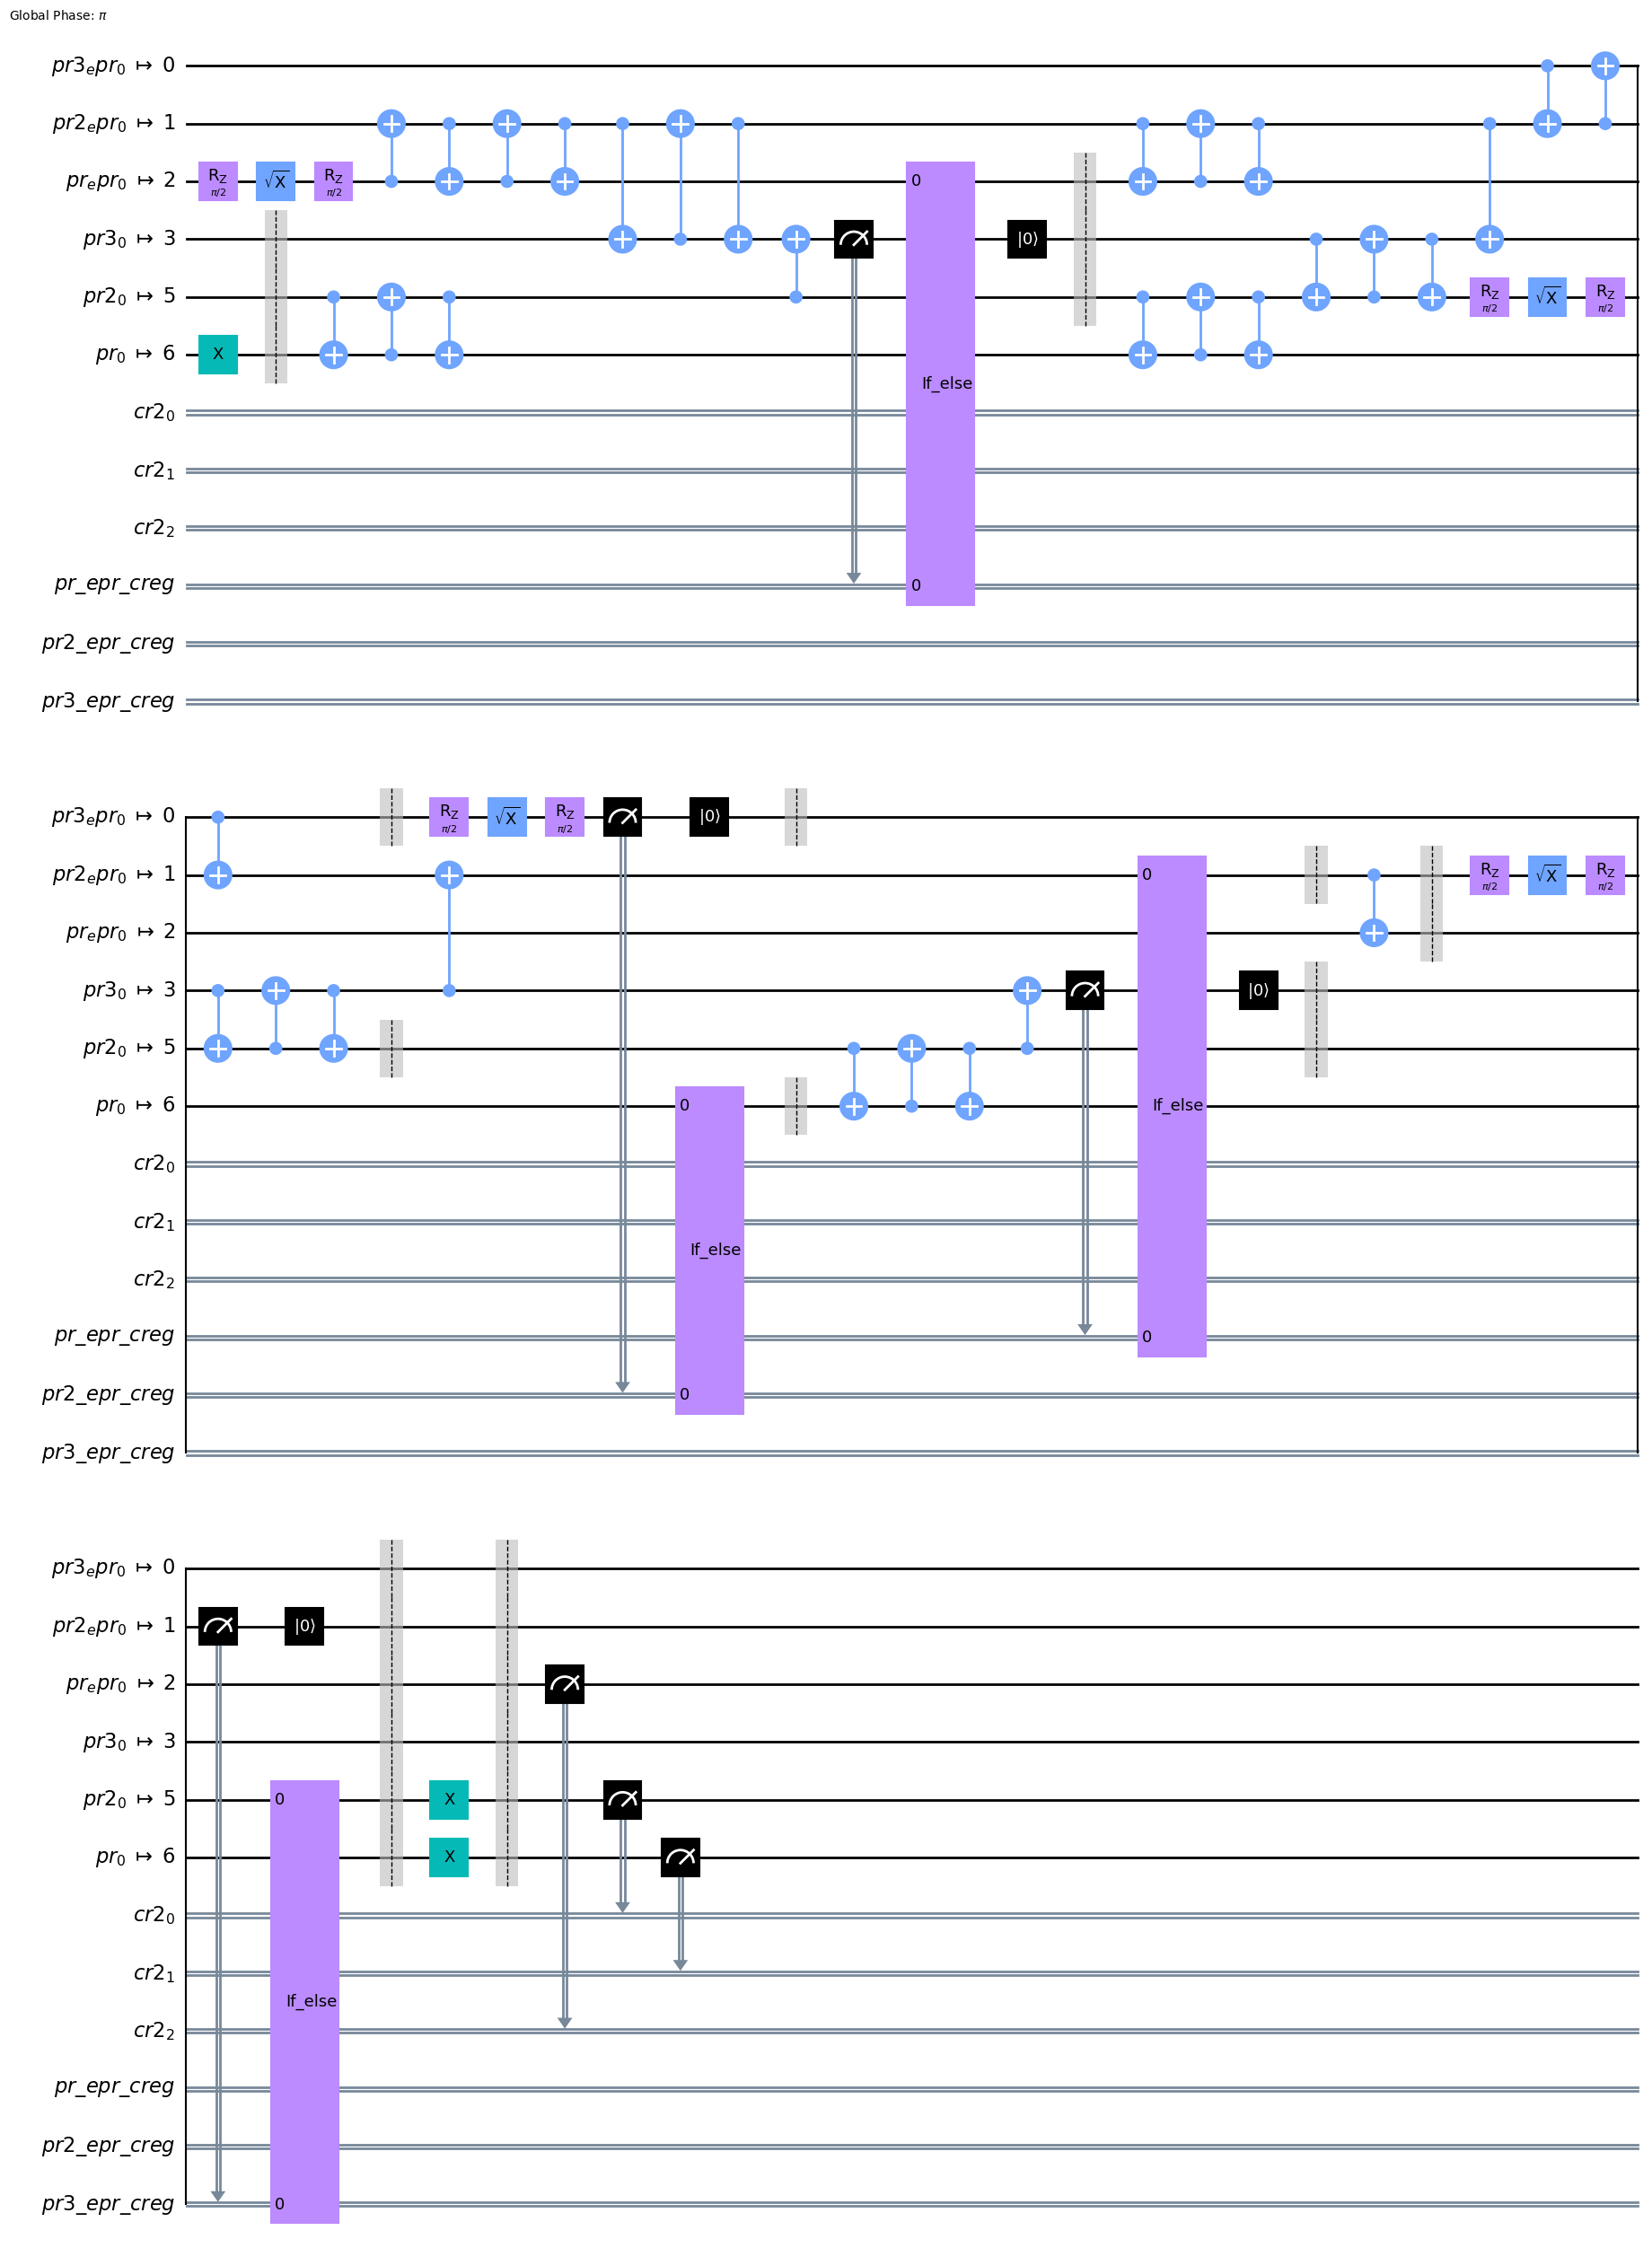

In [6]:
hub = "ibm-q"
group = "open"
project = "main"
backend_name = "ibm_perth"
hgp = f"{hub}/{group}/{project}"
# Get our backend
provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)
print(f"Using backend {backend.name}")
ppt = transpile(pp, backend=backend)
ppt.draw(idle_wires=False, output="mpl")

In [81]:
# execute the circuit
job = backend.run(ppt, shots=1000, dynamic=True)
print(job.status())
print(job.job_id())


JobStatus.QUEUED
chqq6g2najhpa65vd1r0


In [12]:
job = service.job('chqq6g2najhpa65vd1r0') #chqmdaspd6rr9jk2nfsg
print(job.status())

JobStatus.DONE


{'000 00': 130, '100 00': 441, '101 00': 42, '110 00': 149, '111 00': 23, '001 00': 99, '010 00': 45, '011 00': 71}


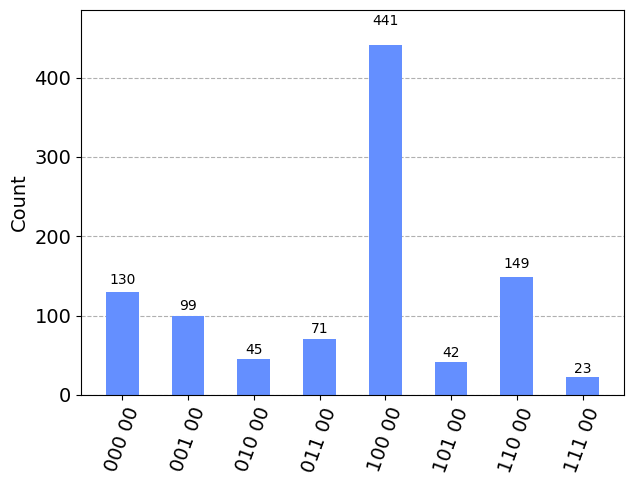

In [13]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
gok = getActualCounts(pp, counts)
print(gok)
plot_histogram(gok)

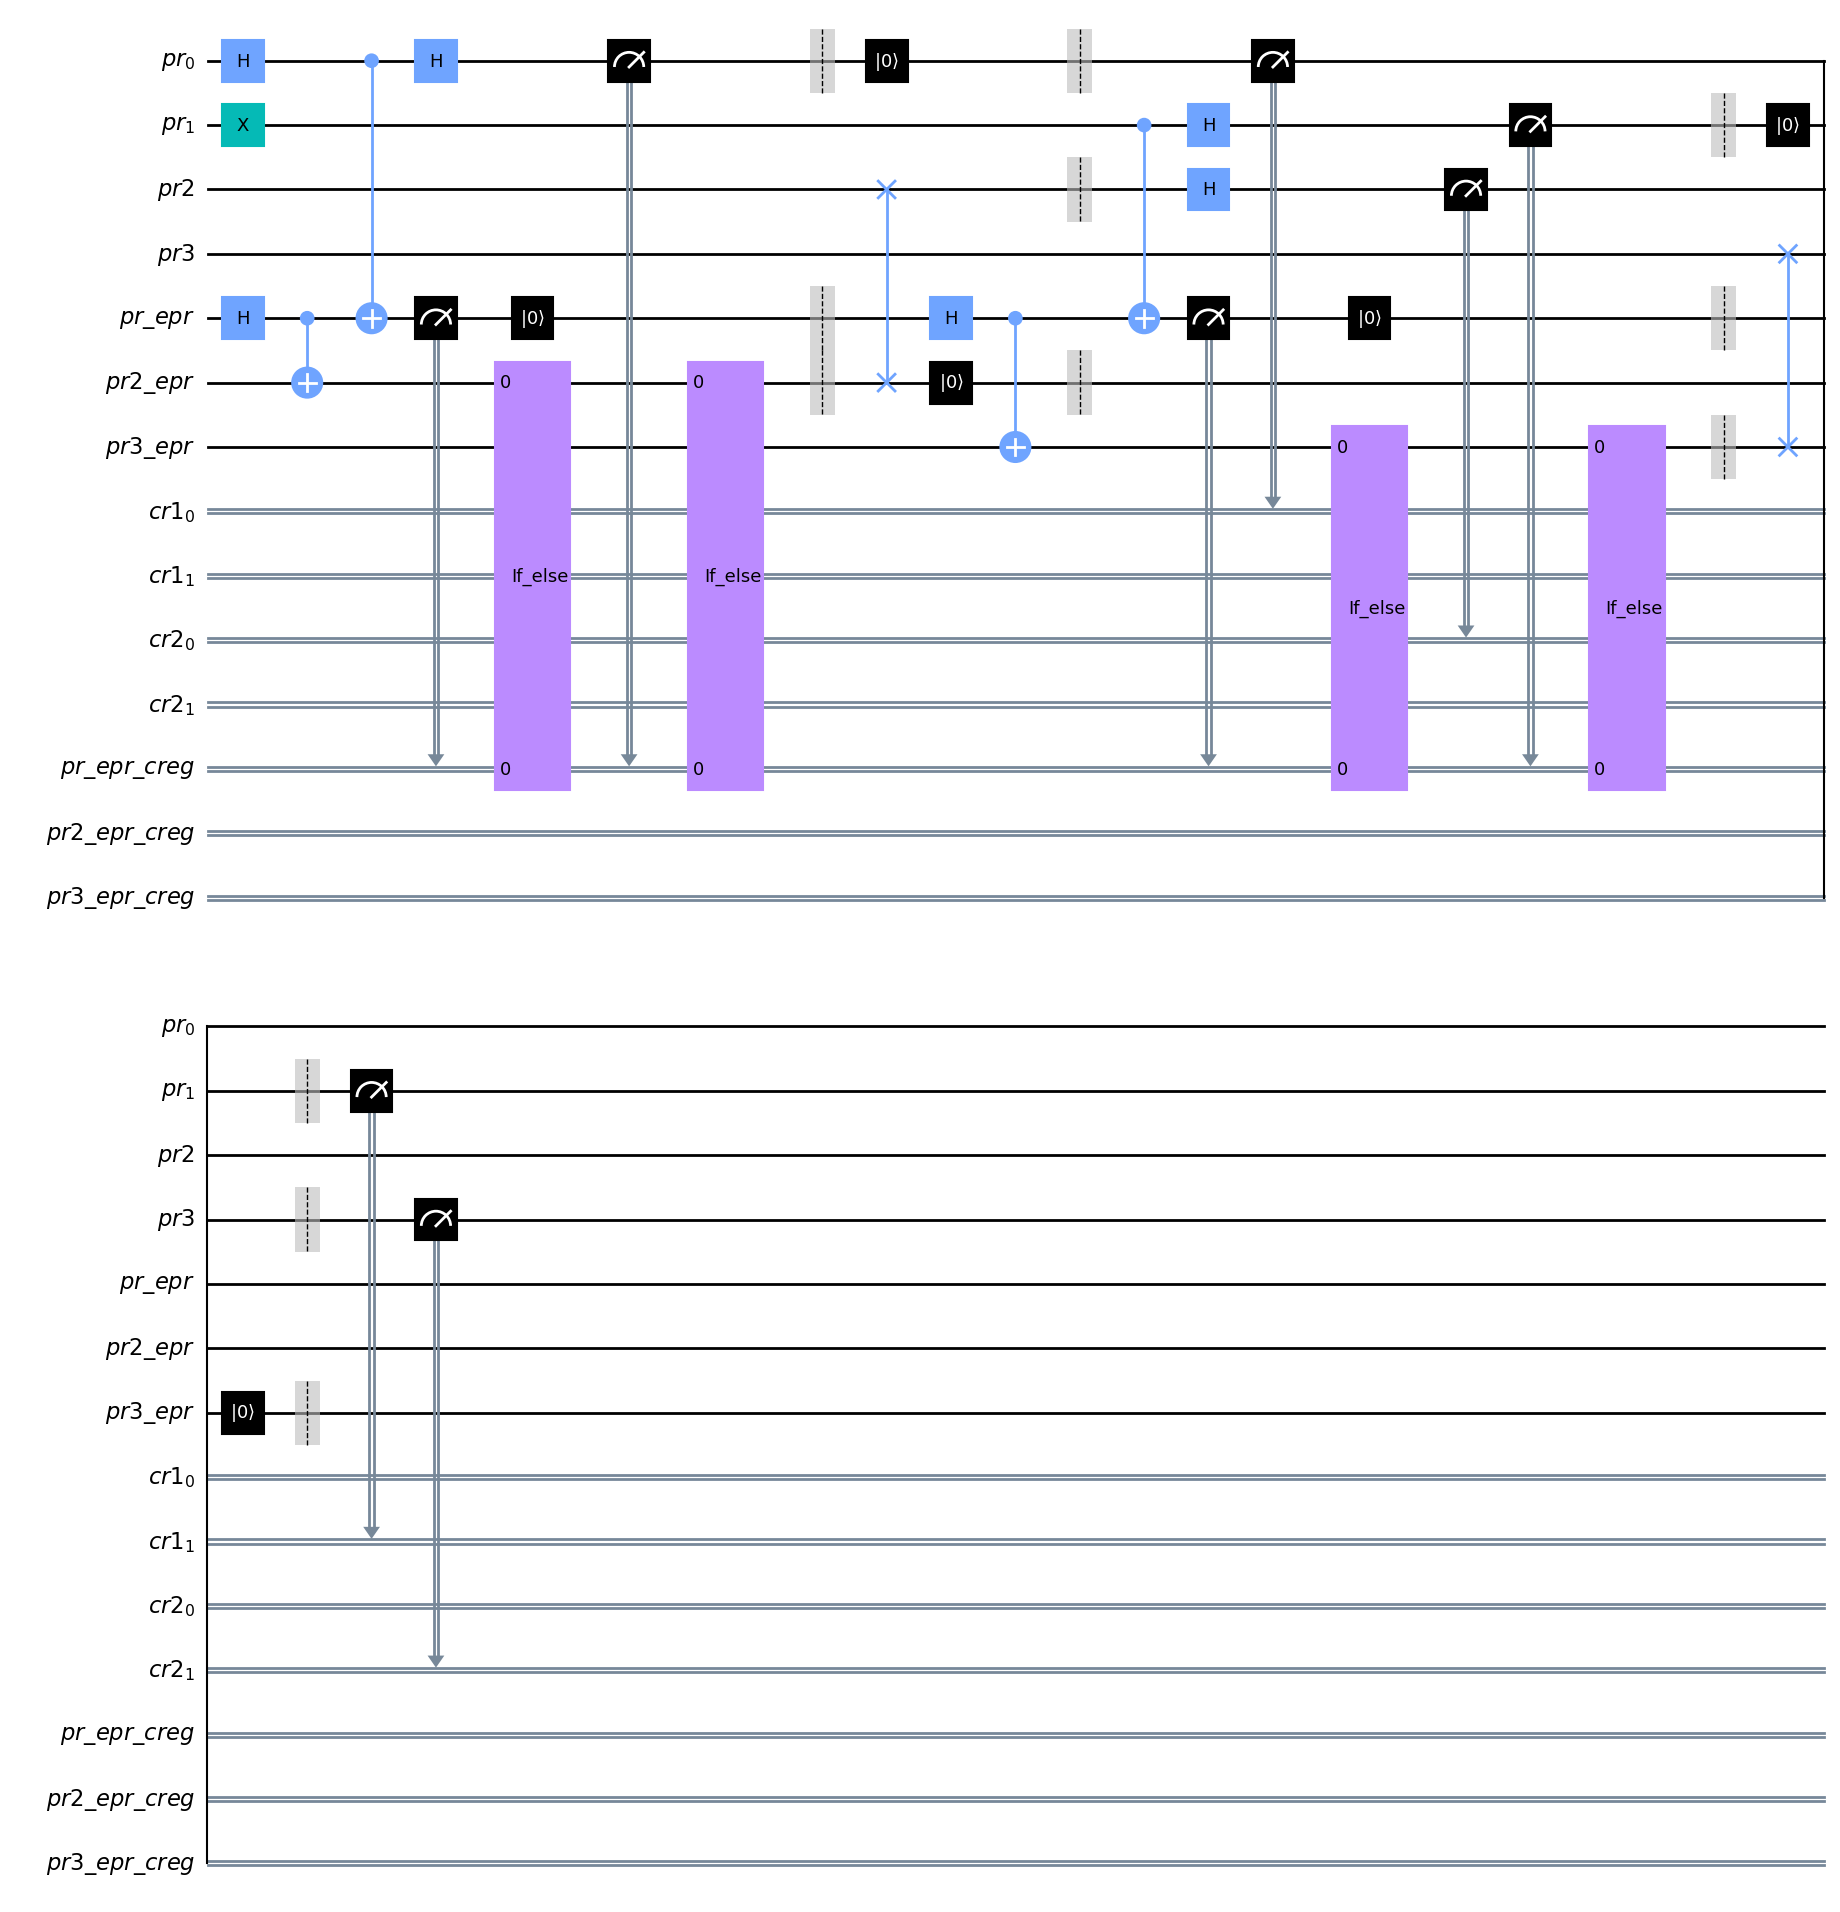

In [5]:
# check out scatter
pp = QuantumCircuit()
pr = QuantumRegister(2, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(2, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,pr3,cr1,cr2)
pp.h(pr[0])
pp.x(pr[1])
m = MPI_collective.CollectiveMPI(pp, pr, n=1)
m.scatter([pr[0], pr[1]], [pr2[0],pr3[0]])
pp.h(pr2[0])
pp.measure([pr[0],pr[1], pr2[0],pr3[0]], [cr1[0],cr1[1], cr2[0],cr2[1]])
pp.draw('mpl')

{'10 00': 100}


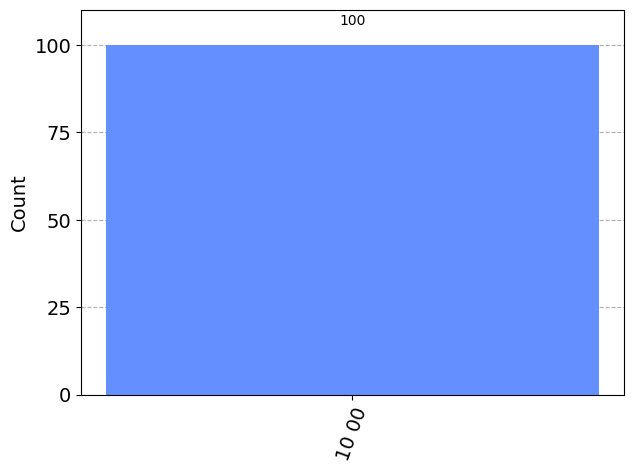

In [6]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 100
t_qpe3 = transpile(pp, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
gok = getActualCounts(t_qpe3, answer)
print(gok)
plot_histogram(gok)

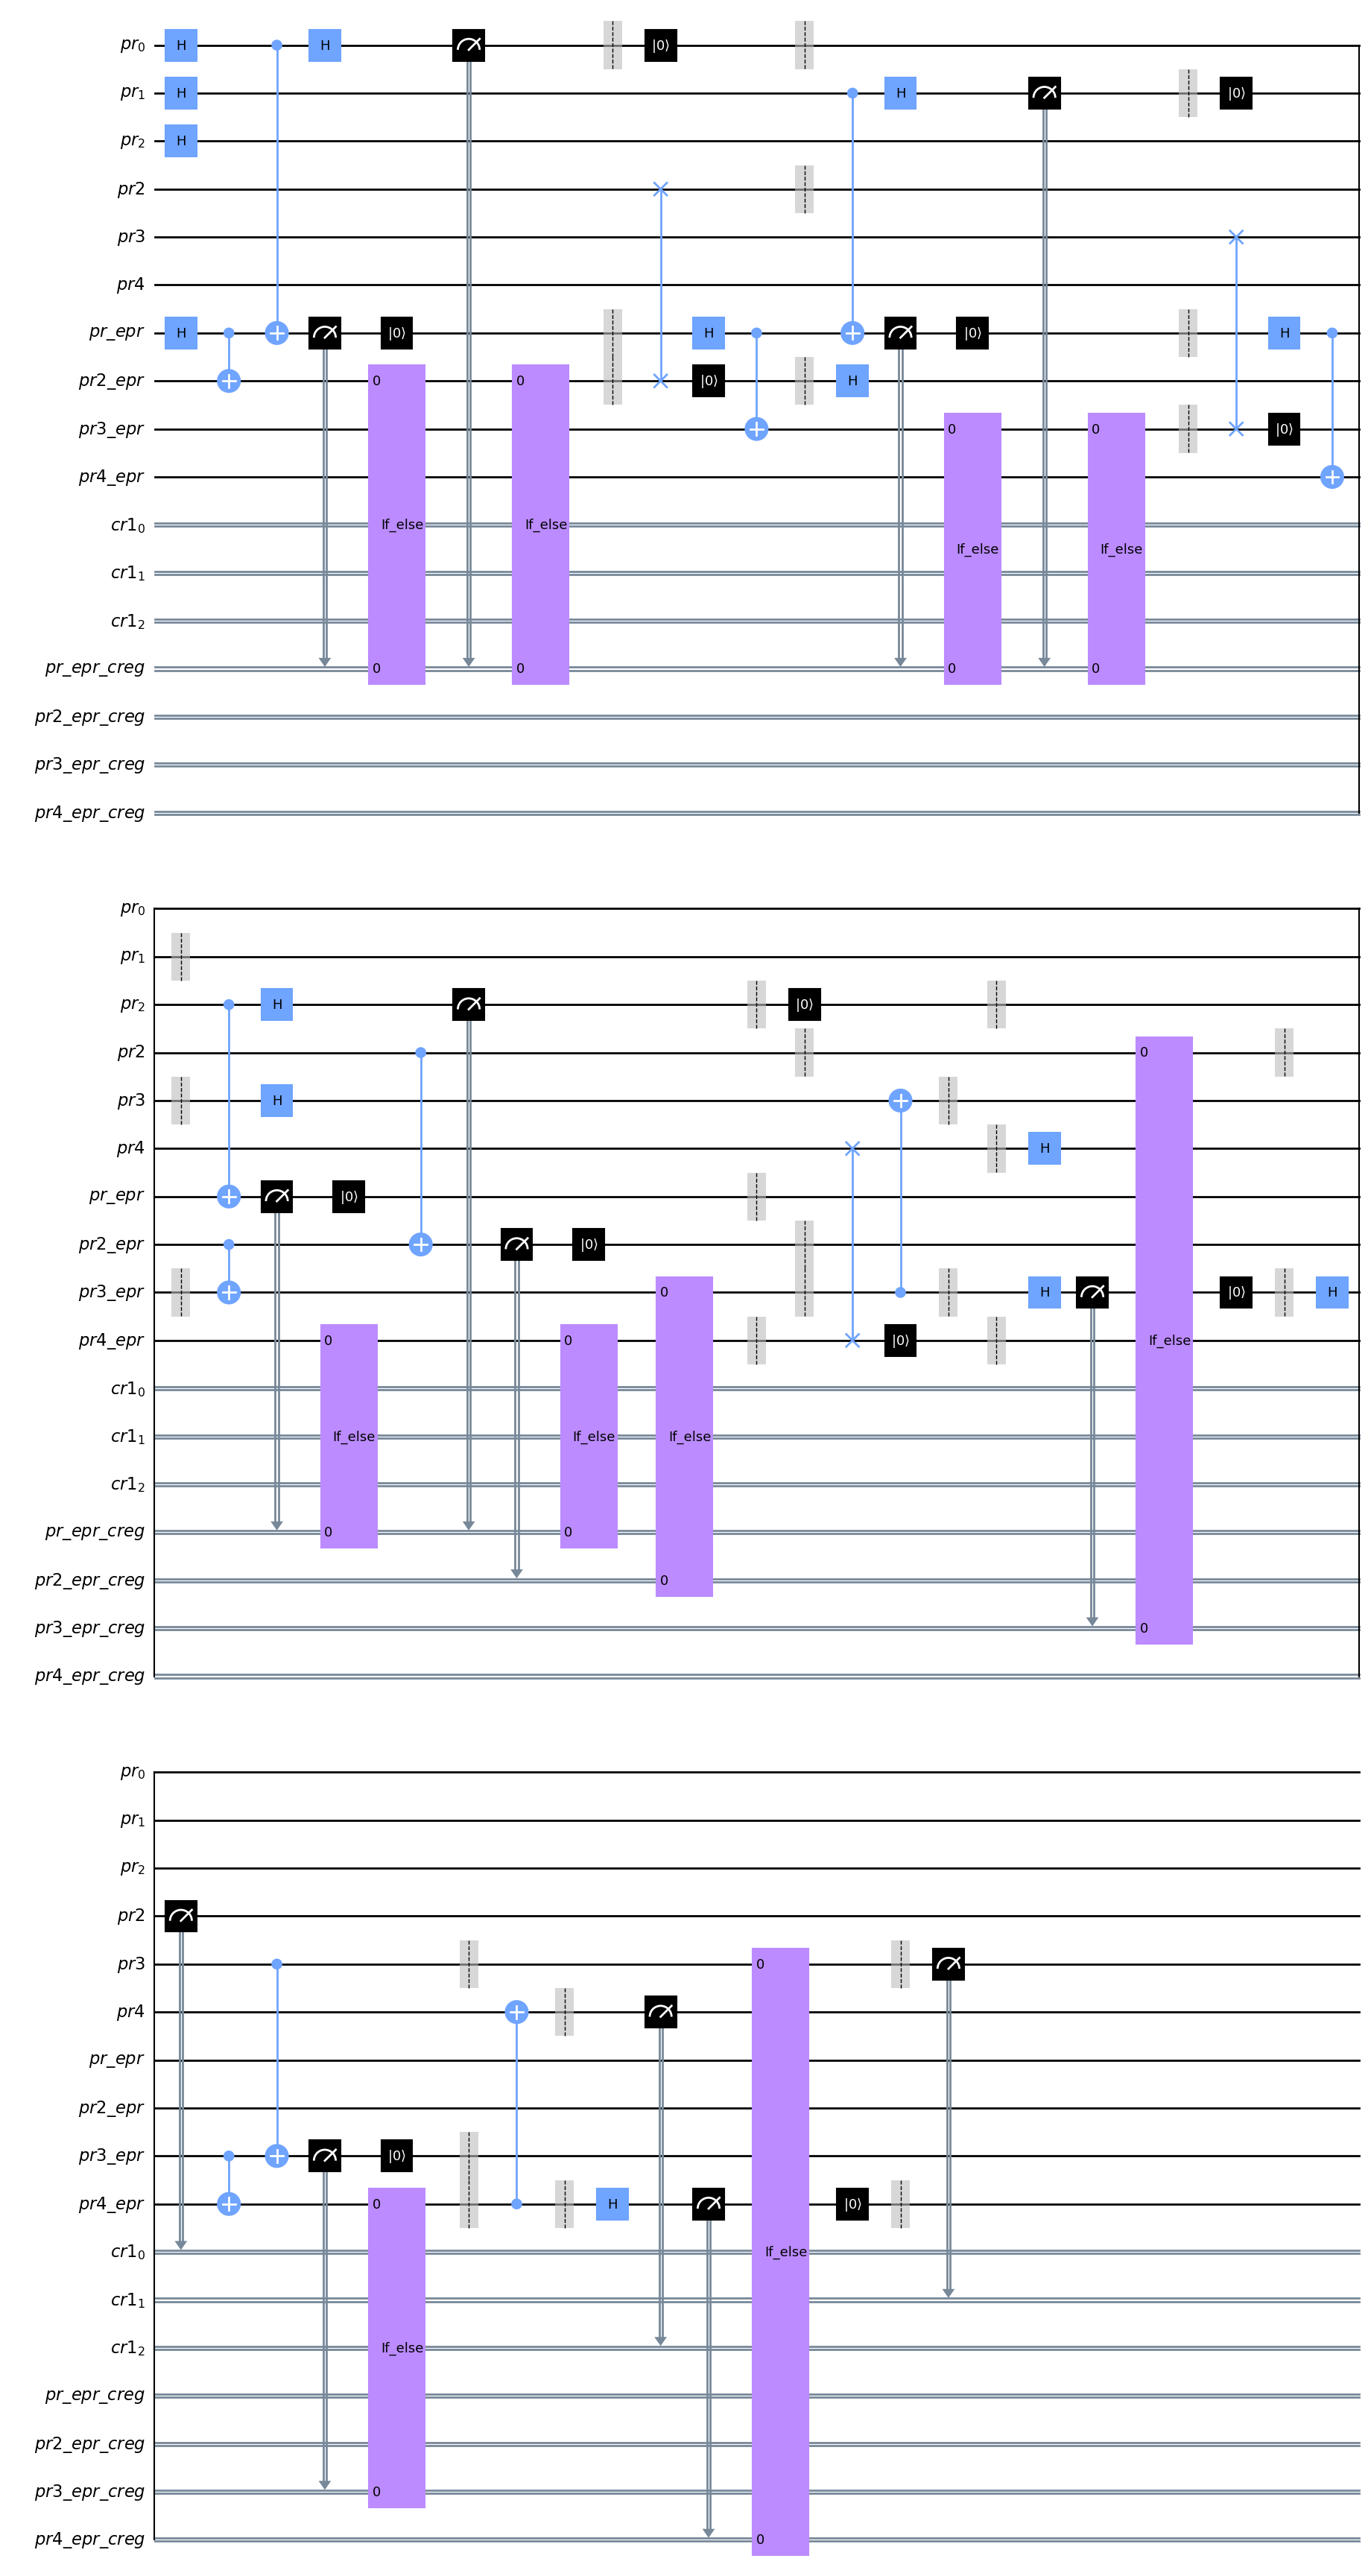

In [33]:
# check out sequential reduce
pp = QuantumCircuit()
pr = QuantumRegister(3, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
pr4 = QuantumRegister(1, 'pr4')
cr1 = ClassicalRegister(3, 'cr1')
pp.add_register(pr,pr2,pr3,pr4,cr1)
pp.h([pr[0],pr[1], pr[2]])
m = MPI_collective.CollectiveMPI(pp, pr, n=1)
m.scatter([pr[0], pr[1], pr[2]], [pr2[0],pr3[0], pr4[0]])

ppp = QuantumCircuit(2)
ppp.h(1)
ppp.cx(0, 1)

m.sequentialReduce([pr2[0], pr3[0], pr4[0]], ppp)
#pp.h(pr2[0])
pp.measure([pr2[0],pr3[0], pr4[0]], cr1)
pp.draw('mpl')

{'111': 53, '000': 47}


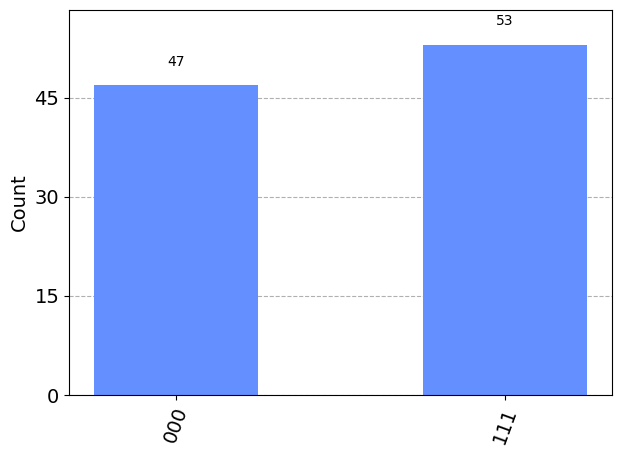

In [34]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 100
t_qpe3 = transpile(pp, aer_sim)
results = aer_sim.run(t_qpe3, shots=shots).result()
answer = results.get_counts()
gok = getActualCounts(t_qpe3, answer)
print(gok)
plot_histogram(gok)

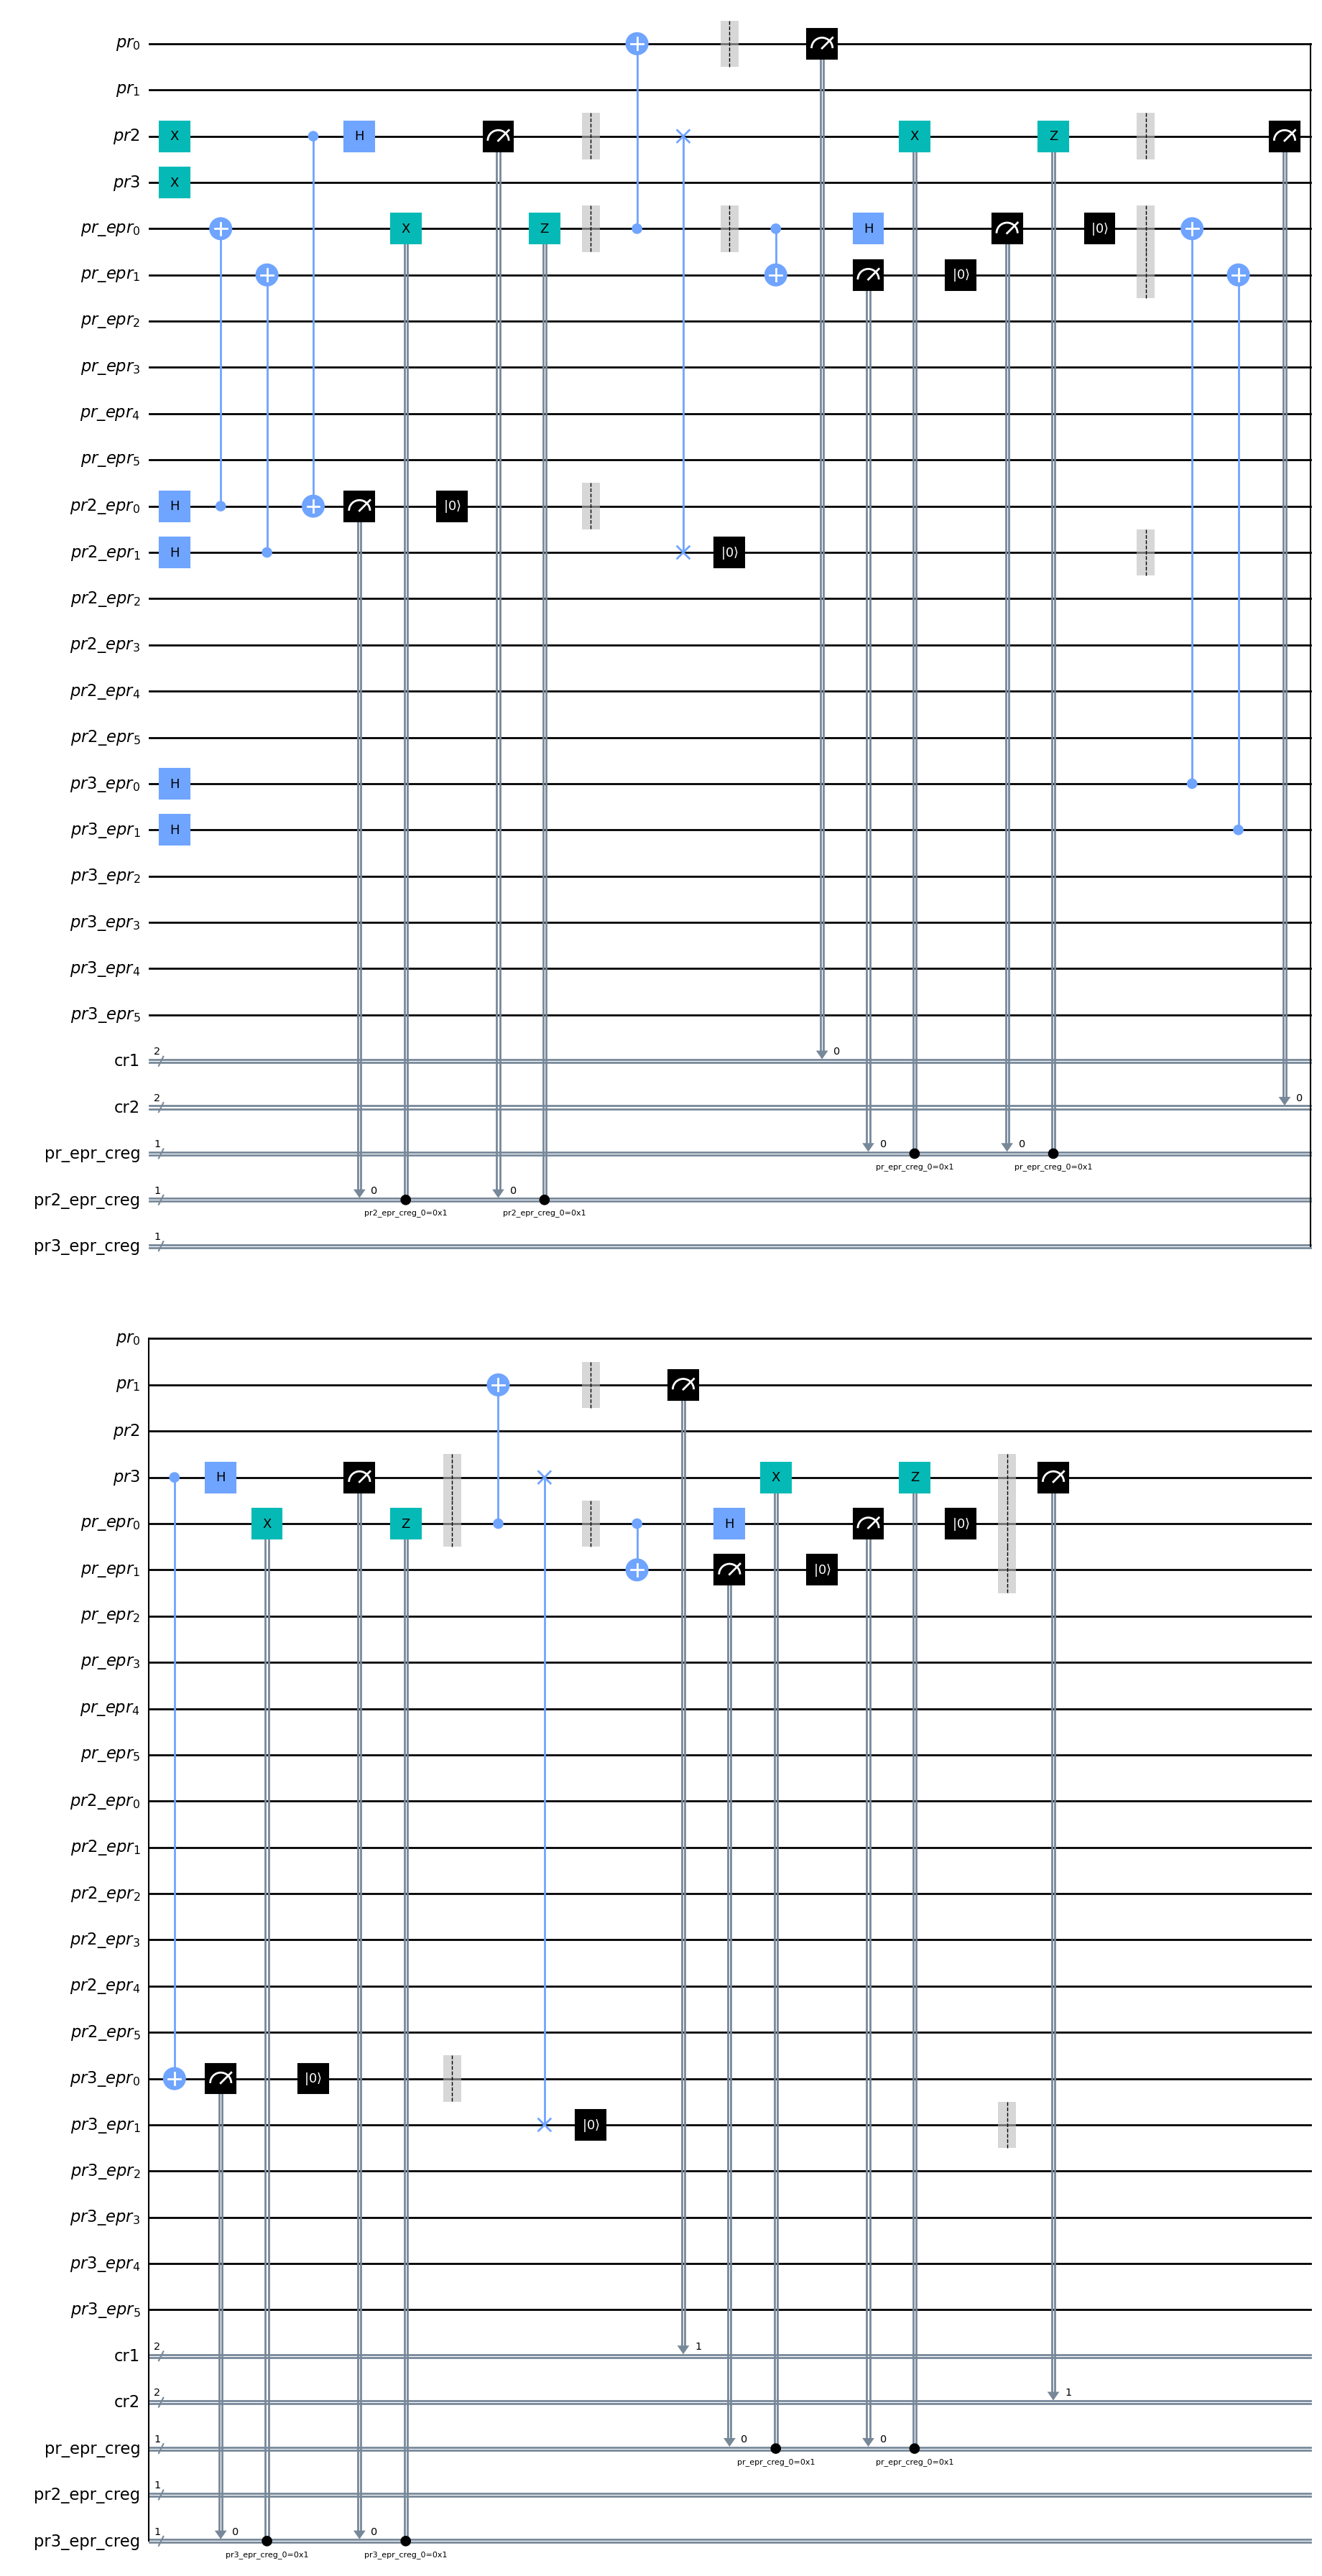

In [2]:
# check out gather
pp = QuantumCircuit()
pr = QuantumRegister(2, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(2, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
cr3 = ClassicalRegister(2, 'cr3')
pp.add_register(pr,pr2,pr3,cr1,cr2)
pp.x(pr2[0])
pp.x(pr3[0])
m = MPI_collective.CollectiveMPI(pp, pr)
m.gather([pr2[0], pr3[0]], [pr[0],pr[1]])
pp.measure([pr[0],pr[1], pr2[0],pr3[0]], [cr1[0],cr1[1], cr2[0],cr2[1]])
pp.draw('mpl')

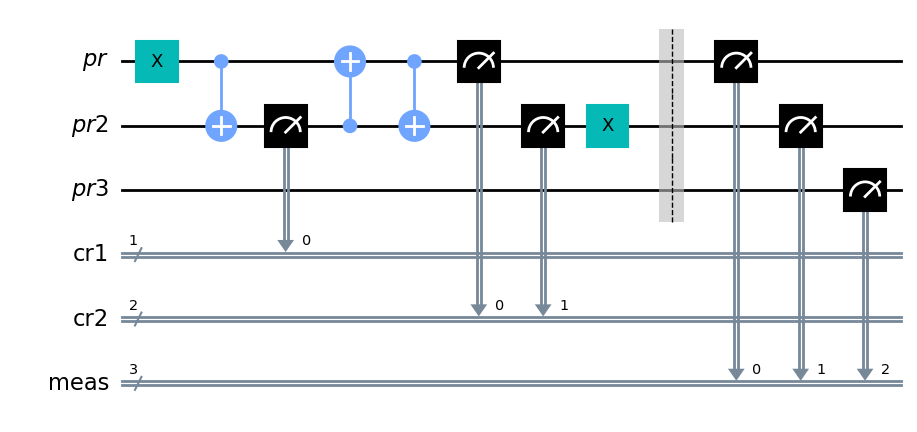

In [6]:
# point to point unit test 
pp = QuantumCircuit()
pr = QuantumRegister(1, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(1, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,cr1,cr2,pr3)
pp.x(pr[0])
pp.cx(pr[0],pr2[0])
pp.measure(pr2[0], cr1[0])
pp.cx(pr2[0],pr[0])
pp.cx(pr[0],pr2[0])
pp.measure([pr[0],pr2[0]], [cr2[0],cr2[1]])
pp.x(pr2[0])
pp.measure_all()
pp.draw('mpl', filename = "testPoint.png")

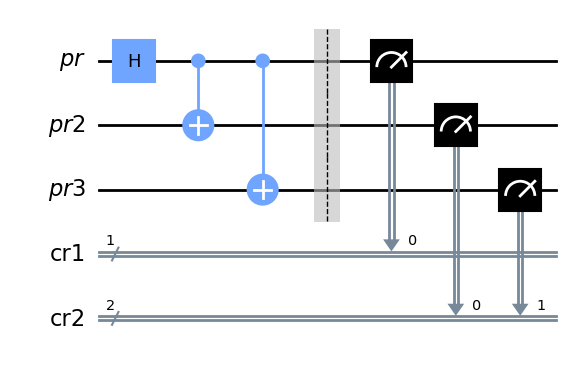

In [94]:
# point to point unit test for h
pp = QuantumCircuit()
pr = QuantumRegister(1, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(1, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,cr1,cr2,pr3)
pp.h(pr[0])
pp.cx(pr[0],pr2[0])
pp.cx(pr[0],pr3[0])
pp.barrier()
pp.measure([pr[0], pr2[0],pr3[0]], [cr1[0], cr2[0],cr2[1]])
pp.draw('mpl')

{'1 0 0 01 01': 28, '0 1 0 01 00': 24, '0 0 1 00 01': 29, '1 1 1 01 01': 32, '0 1 1 00 01': 29, '0 1 0 00 01': 34, '0 0 1 00 00': 37, '1 1 1 00 00': 20, '0 1 0 01 01': 37, '0 0 0 01 01': 21, '0 0 1 01 01': 30, '1 1 1 00 01': 24, '1 1 1 01 00': 30, '1 0 0 01 00': 32, '1 0 1 00 00': 36, '0 1 0 00 00': 32, '0 0 1 01 00': 39, '0 1 1 01 01': 25, '0 0 0 00 00': 33, '0 0 0 01 00': 28, '1 0 1 01 00': 44, '1 1 0 00 00': 32, '1 1 0 00 01': 37, '0 0 0 00 01': 34, '1 1 0 01 00': 34, '1 0 0 00 01': 27, '1 1 0 01 01': 31, '1 0 1 00 01': 27, '1 0 0 00 00': 34, '0 1 1 01 00': 31, '0 1 1 00 00': 36, '1 0 1 01 01': 33}
latency is 0.033455848693847656s


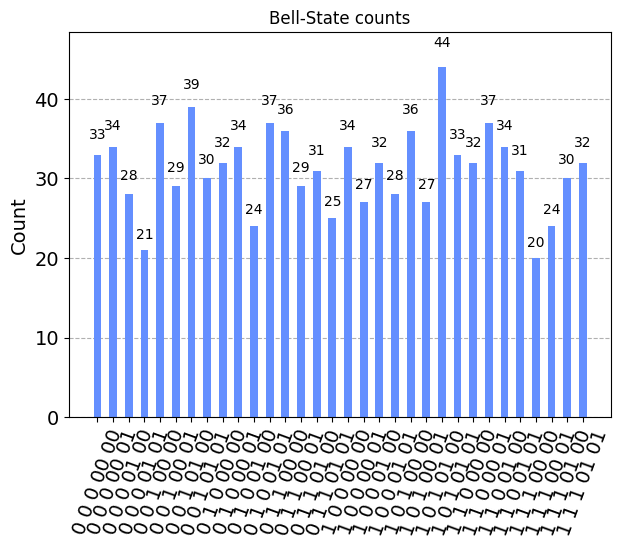

In [10]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')

from qiskit.visualization import plot_histogram
#pp2 = transpile(pp,aer_sim)
result = aer_sim.run(pp, shots = 1000).result()
counts = result.get_counts(pp)
print(counts)
print('latency is ' + str(result.time_taken)+'s')
plot_histogram(counts, title='Bell-State counts')



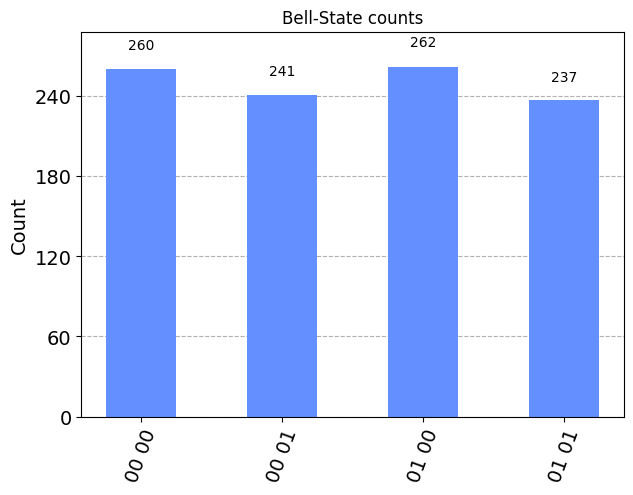

In [11]:
aa = convert.getActualCounts(pp,counts)
plot_histogram(aa, title='Bell-State counts')

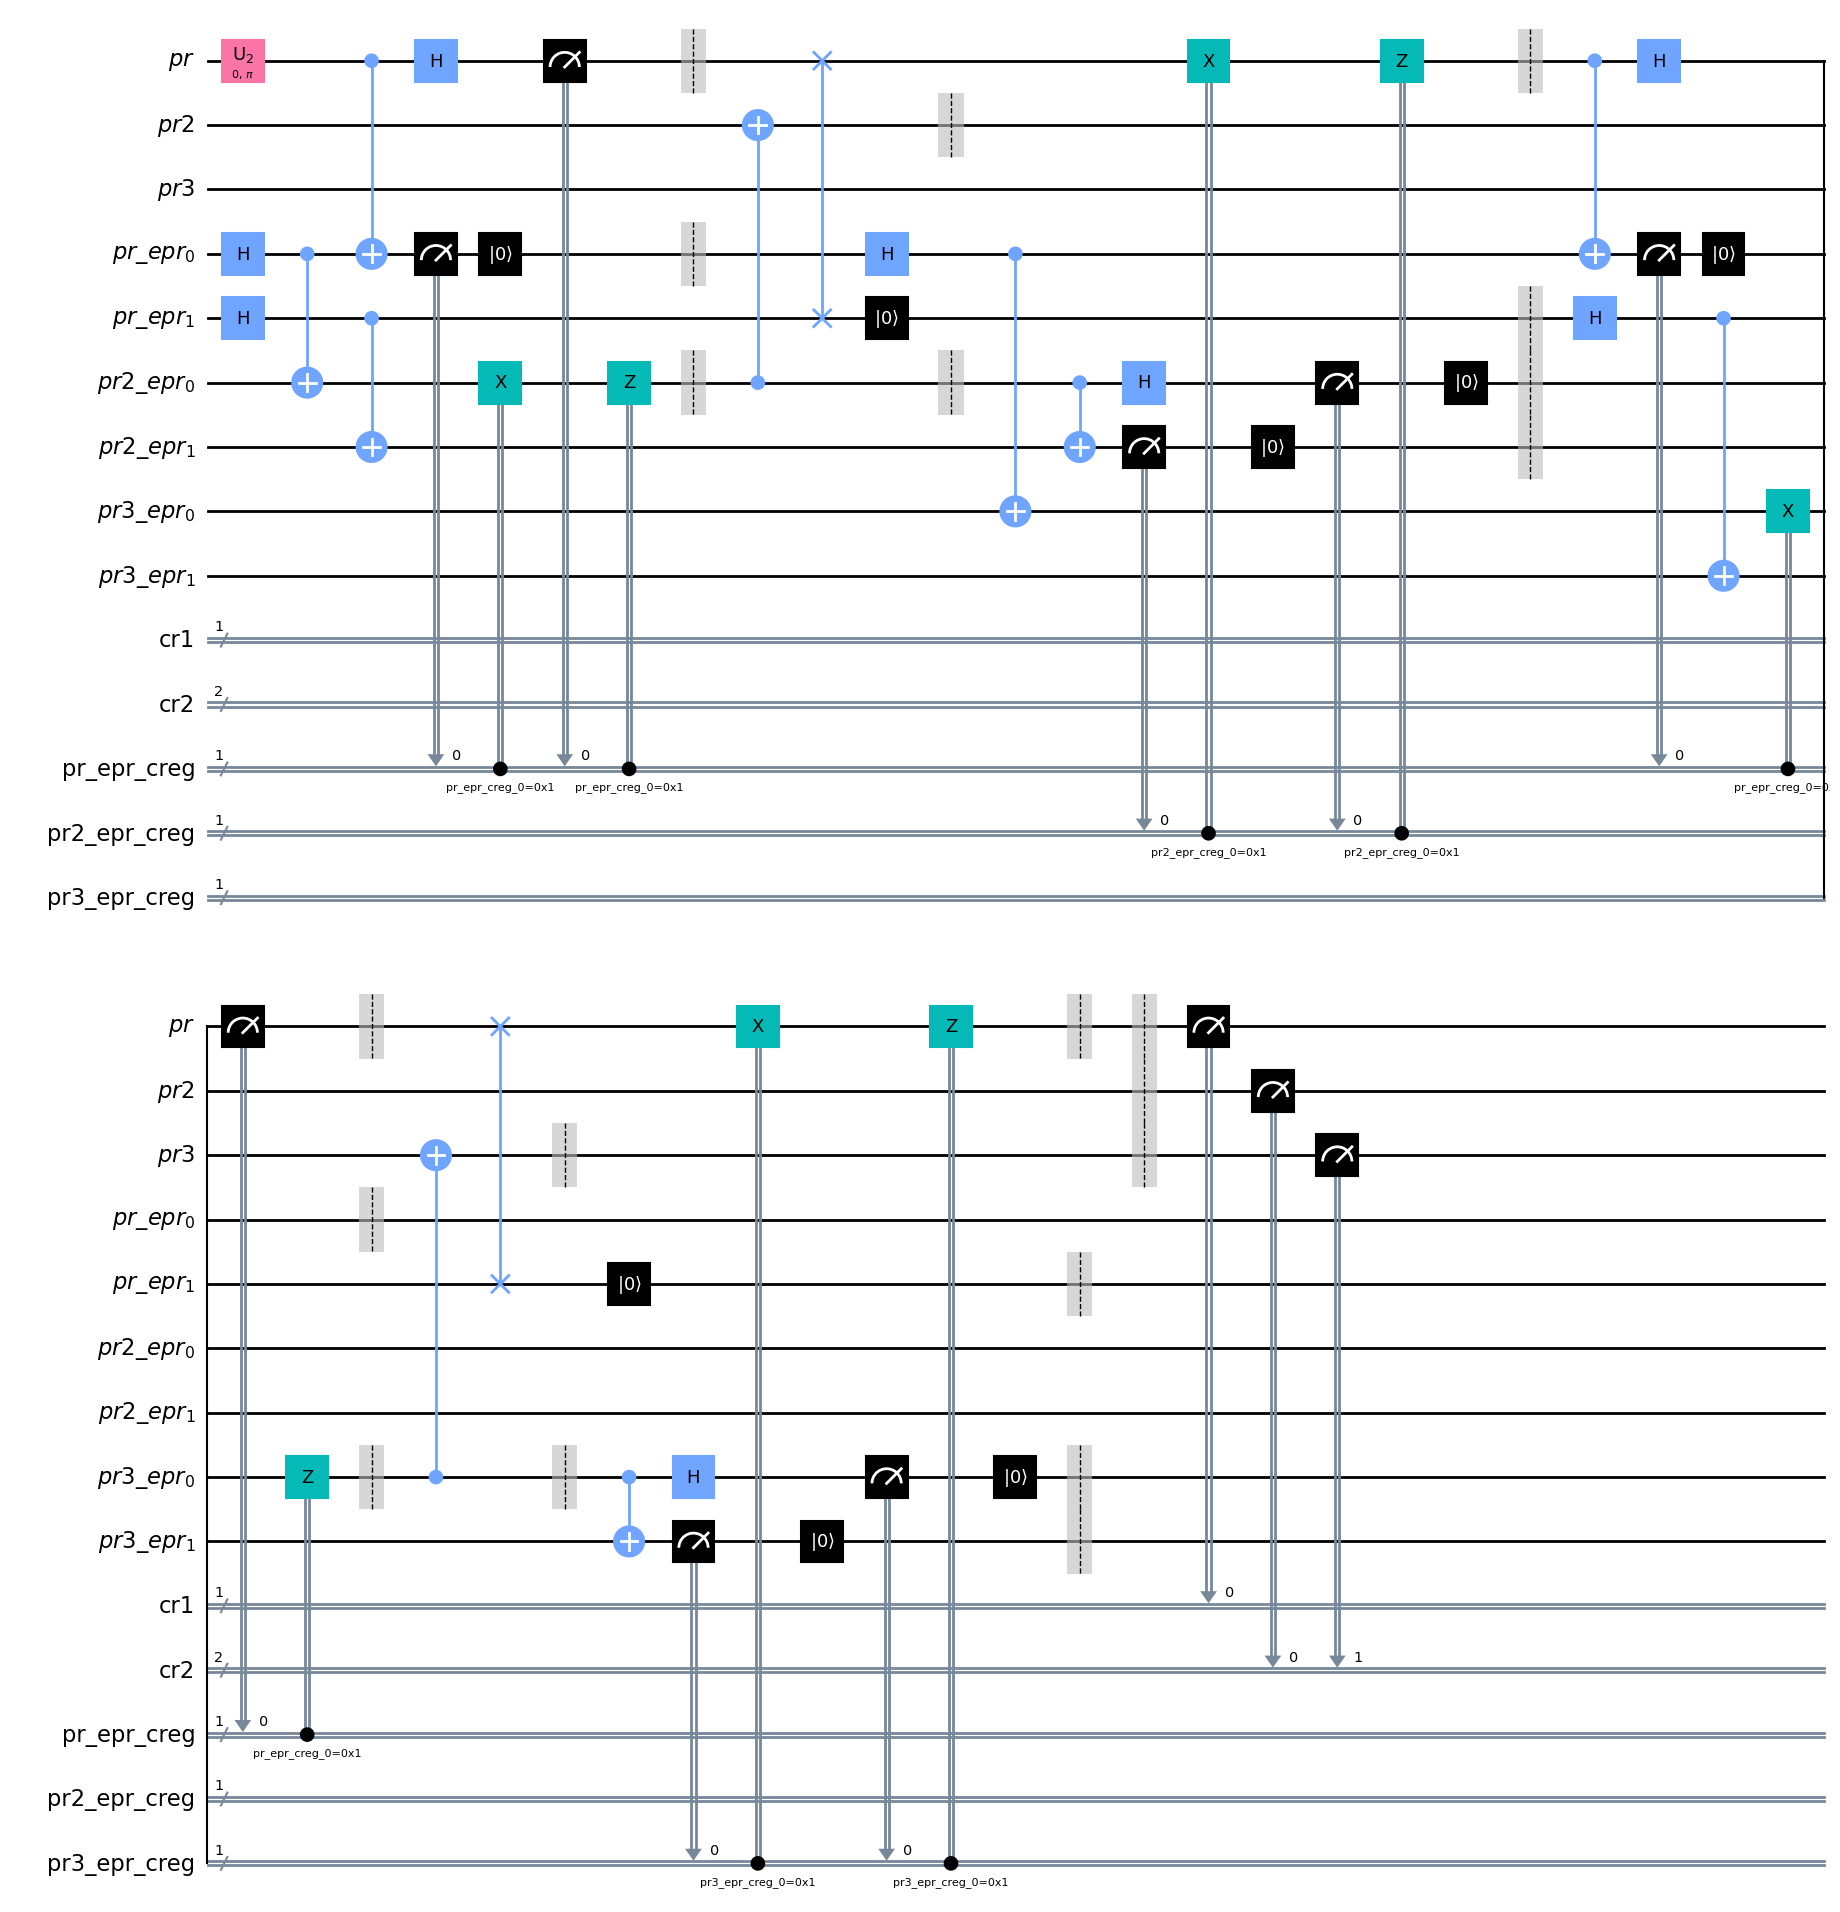

In [96]:
qtr,lol = convert.convertQC(pp)
qtr.draw("mpl")

{'1 1 1 00 0': 62, '0 0 1 00 0': 58, '0 1 0 00 0': 55, '1 0 1 00 0': 65, '0 1 0 11 1': 57, '1 1 0 11 1': 65, '0 0 0 11 1': 58, '1 0 0 00 0': 65, '0 0 0 00 0': 65, '1 0 1 11 1': 78, '0 0 1 11 1': 74, '1 0 0 11 1': 51, '1 1 0 00 0': 61, '0 1 1 11 1': 51, '1 1 1 11 1': 64, '0 1 1 00 0': 71}
{'pr_epr_creg': 1, 'pr2_epr_creg': 1, 'pr3_epr_creg': 1}


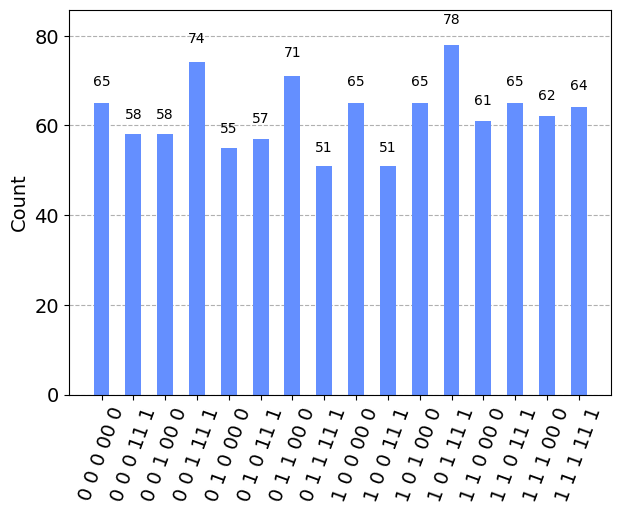

In [97]:
result = aer_sim.run(qtr, shots = 1000).result()
counts = result.get_counts(qtr)
print(counts)
print(qtr.metadata)
plot_histogram(counts)

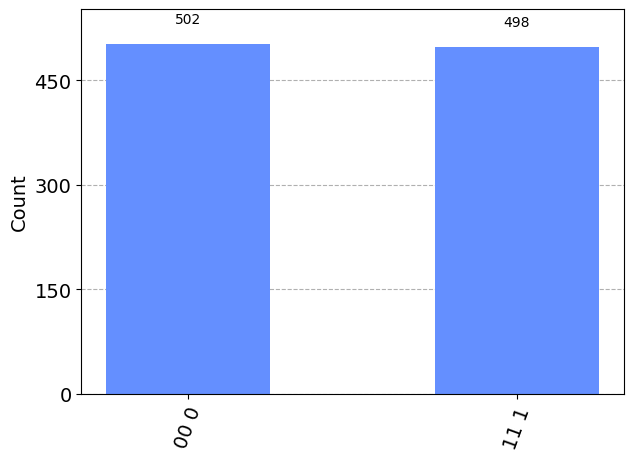

In [98]:
das = convert.getActualCounts(qtr, counts)
plot_histogram(das)

In [8]:
lol.eprConnections

{'pr': {'pr': 0, 'pr2': 3, 'pr3': 0},
 'pr2': {'pr': 3, 'pr2': 0, 'pr3': 0},
 'pr3': {'pr': 0, 'pr2': 0, 'pr3': 0}}